# Hotel Dataset 

## 1. Data Preprocessing

#### Preparations

In [78]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, stats , boxcox, skew
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

dataset= pd.read_csv(r"e:\Courses\Cellula\Datasets\first inten project.csv")

#### Data Understanding

In [33]:
dataset  # show dataset

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [34]:
dataset.shape

(36285, 17)

In [35]:
dataset.info() # columns datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
# Separate categorical columns
categorical_cols = dataset.select_dtypes(include=["object", "category"]).columns.tolist()

# Drop unwanted columns
categorical_cols = [col for col in categorical_cols if col not in ["date of reservation", "Booking_ID"]]

for col in categorical_cols:
    print(f"Column: {col}")
    print(dataset[col].unique())  
    print("-" * 50)  


Column: type of meal
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
--------------------------------------------------
Column: room type
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
--------------------------------------------------
Column: market segment type
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
--------------------------------------------------
Column: booking status
['Not_Canceled' 'Canceled']
--------------------------------------------------


### Explanation of Each Column in the Dataset:  

    1. Booking_ID: A unique identifier for each booking.  
    2. number of adults: The number of adults included in the booking.  
    3. number of children: The number of children included in the booking.  
    4. number of weekend nights: The number of weekend nights (Friday & Saturday) in the stay.  
    5. number of week nights: The number of weekday nights (Sunday to Thursday) in the stay.  
    6. type of meal: The type of meal plan chosen by the customer (e.g., Meal Plan 1, Not Selected).  
    7. car parking space: Indicates whether a car parking space was booked (0 = No, 1 = Yes).  
    8. room type: The type of room allocated for the booking (e.g., Room_Type 1).  
    9. lead time: The number of days between the booking date and the arrival date.  
    10. market segment type: The source from which the booking was made (e.g., Online, Offline).  
    11. repeated: Indicates if the customer is a returning customer (0 = No, 1 = Yes).  
    12. P-C (Previous Canceled): The number of past bookings that were canceled by the customer.  
    13. P-not-C (Previous Not Canceled): The number of past bookings that were not canceled by the customer.  
    14. average price: The average price per night for the booking.  
    15. special requests: The number of special requests made by the customer (e.g., extra bed, high floor).  
    16. date of reservation: The date on which the booking was made.  
    17. booking status: The final status of the booking (either "Canceled" or "Not_Canceled").  

#### Data Checking & Modifications

In [38]:
dataset.isnull().sum()  # Check missing values = Null

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [39]:
dataset.isnull().mean() * 100   # % of missing data

# Handling Missing Values: (If presented)
# If categorical → Fill missing values with the mode (most frequent value).
# If numerical   → Fill missing values with the median to prevent skewing the data.

Booking_ID                  0.0
number of adults            0.0
number of children          0.0
number of weekend nights    0.0
number of week nights       0.0
type of meal                0.0
car parking space           0.0
room type                   0.0
lead time                   0.0
market segment type         0.0
repeated                    0.0
P-C                         0.0
P-not-C                     0.0
average price               0.0
special requests            0.0
date of reservation         0.0
booking status              0.0
dtype: float64

In [40]:
sum(dataset.duplicated())       # check count of duplicated rows
# dataset[dataset.duplicated()] → Display duplicated rows (if Presented)

0

In [ ]:
(dataset.select_dtypes(include=['number']) < 0).sum()  # show how many negative values exist in numerical features


number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
car parking space           0
lead time                   0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
dtype: int64

In [42]:
# dataset.columns = dataset.columns.str.strip()                                 # Remove extra spaces in column names
# dataset = dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Remove spaces in values


In [43]:
# convert date feature to date time 
dataset['date of reservation'] = pd.to_datetime(dataset['date of reservation'],errors='coerce')
dataset

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,2018-09-13,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,2017-10-15,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,2018-12-26,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,2018-07-06,Not_Canceled


#### Overall Describtion

In [44]:
dataset.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,date of reservation
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36248
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733,2018-05-24 15:28:31.410284544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-10-02 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262,NaN


In [ ]:
# Clarify numerical & Categorical columns
num_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
cat_cols = dataset.select_dtypes(include=['object']).columns.tolist()

excluded_cols = ['Booking_ID',"date of reservation"]             # Drop excluded columns 
cat_cols = [col for col in cat_cols if col not in excluded_cols]


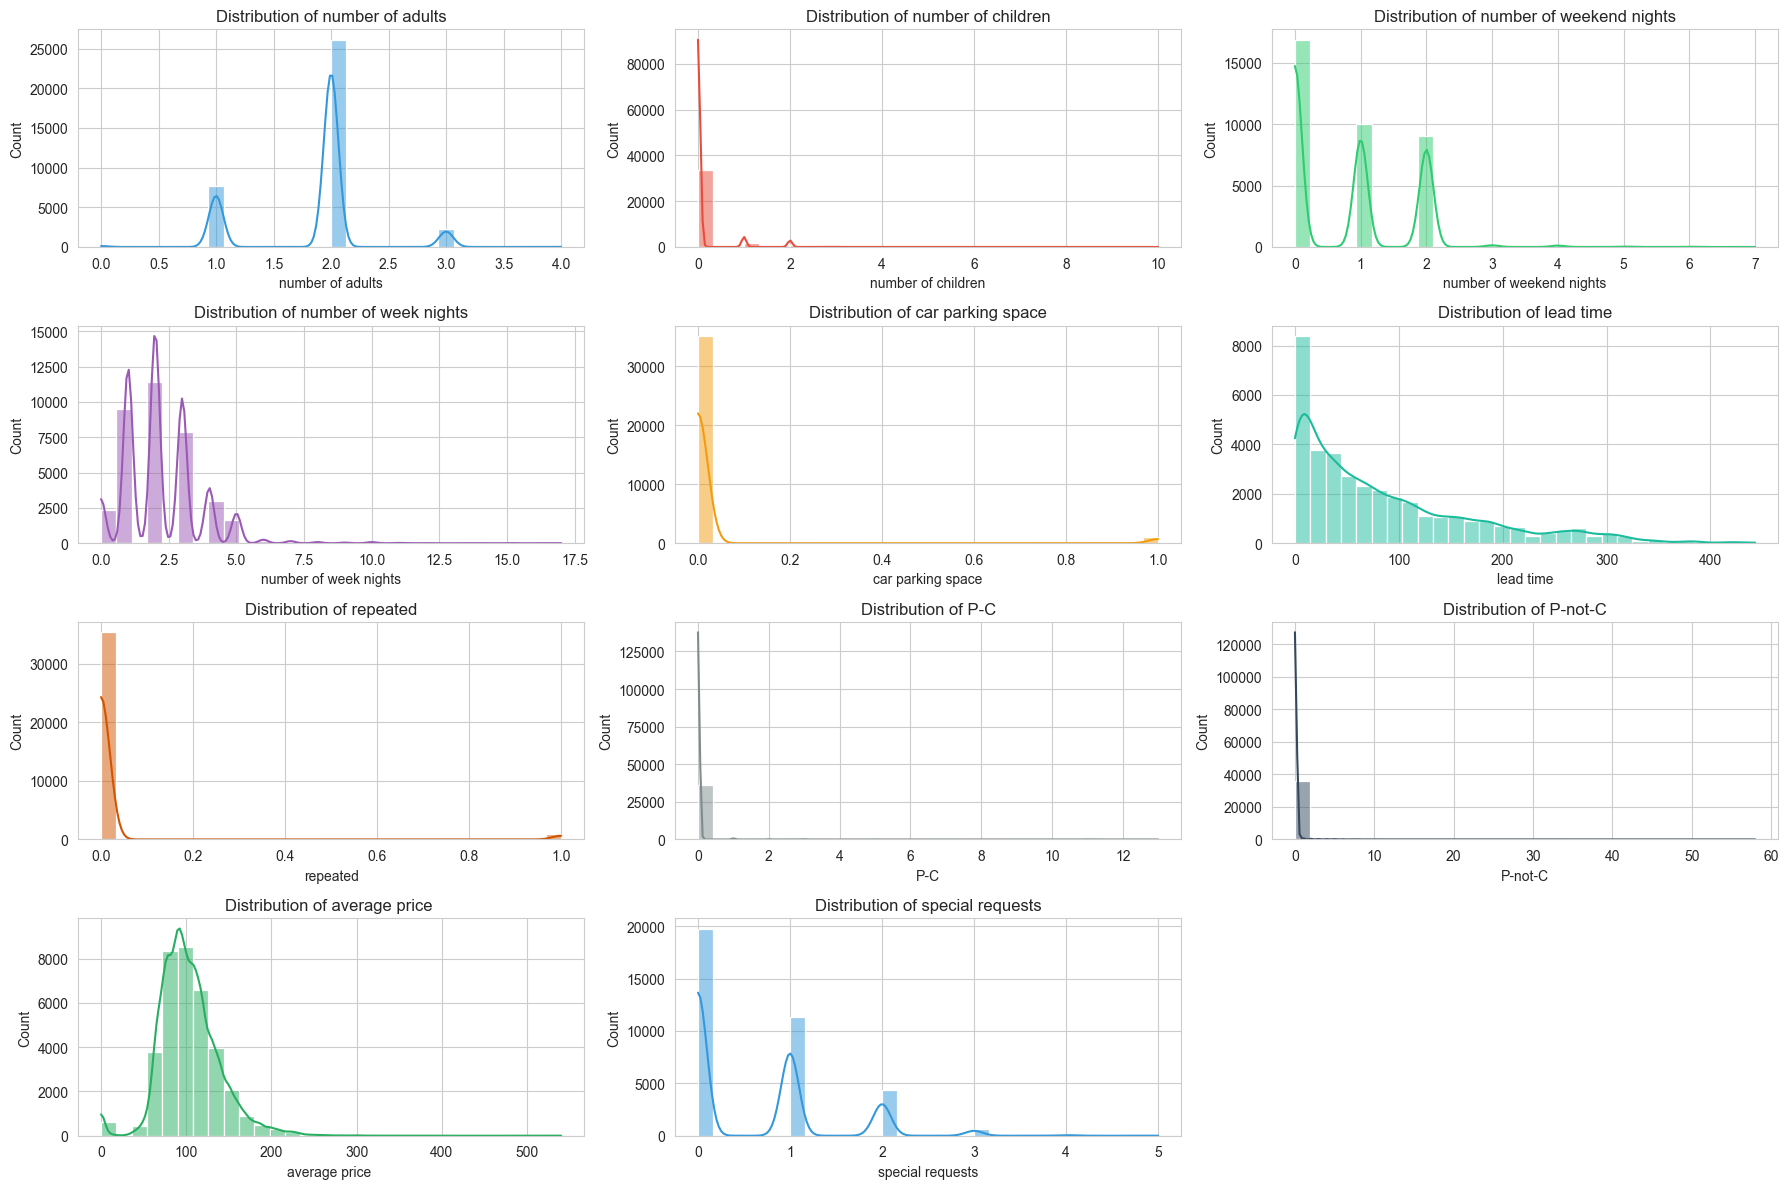

In [ ]:
# Visualize Numerical Features
colors = ["#3498db", "#e74c3c", "#2ecc71", "#9b59b6", "#f39c12", "#1abc9c", "#d35400", "#7f8c8d", "#34495e", "#27ae60"]
num_features = len(num_cols)
rows = (num_features // 3) + (num_features % 3 > 0)  # Adjust rows dynamically
fig, axes = plt.subplots(rows, 3, figsize=(18, 12))
axes = axes.flatten()  

for i, col in enumerate(num_cols):
    sns.histplot(dataset[col], bins=30, kde=True, ax=axes[i], color=colors[i % len(colors)])  
    axes[i].set_title(f"Distribution of {col}")
for j in range(i + 1, len(axes)): # Hide unused subplots if num_features is not a multiple of 3
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()



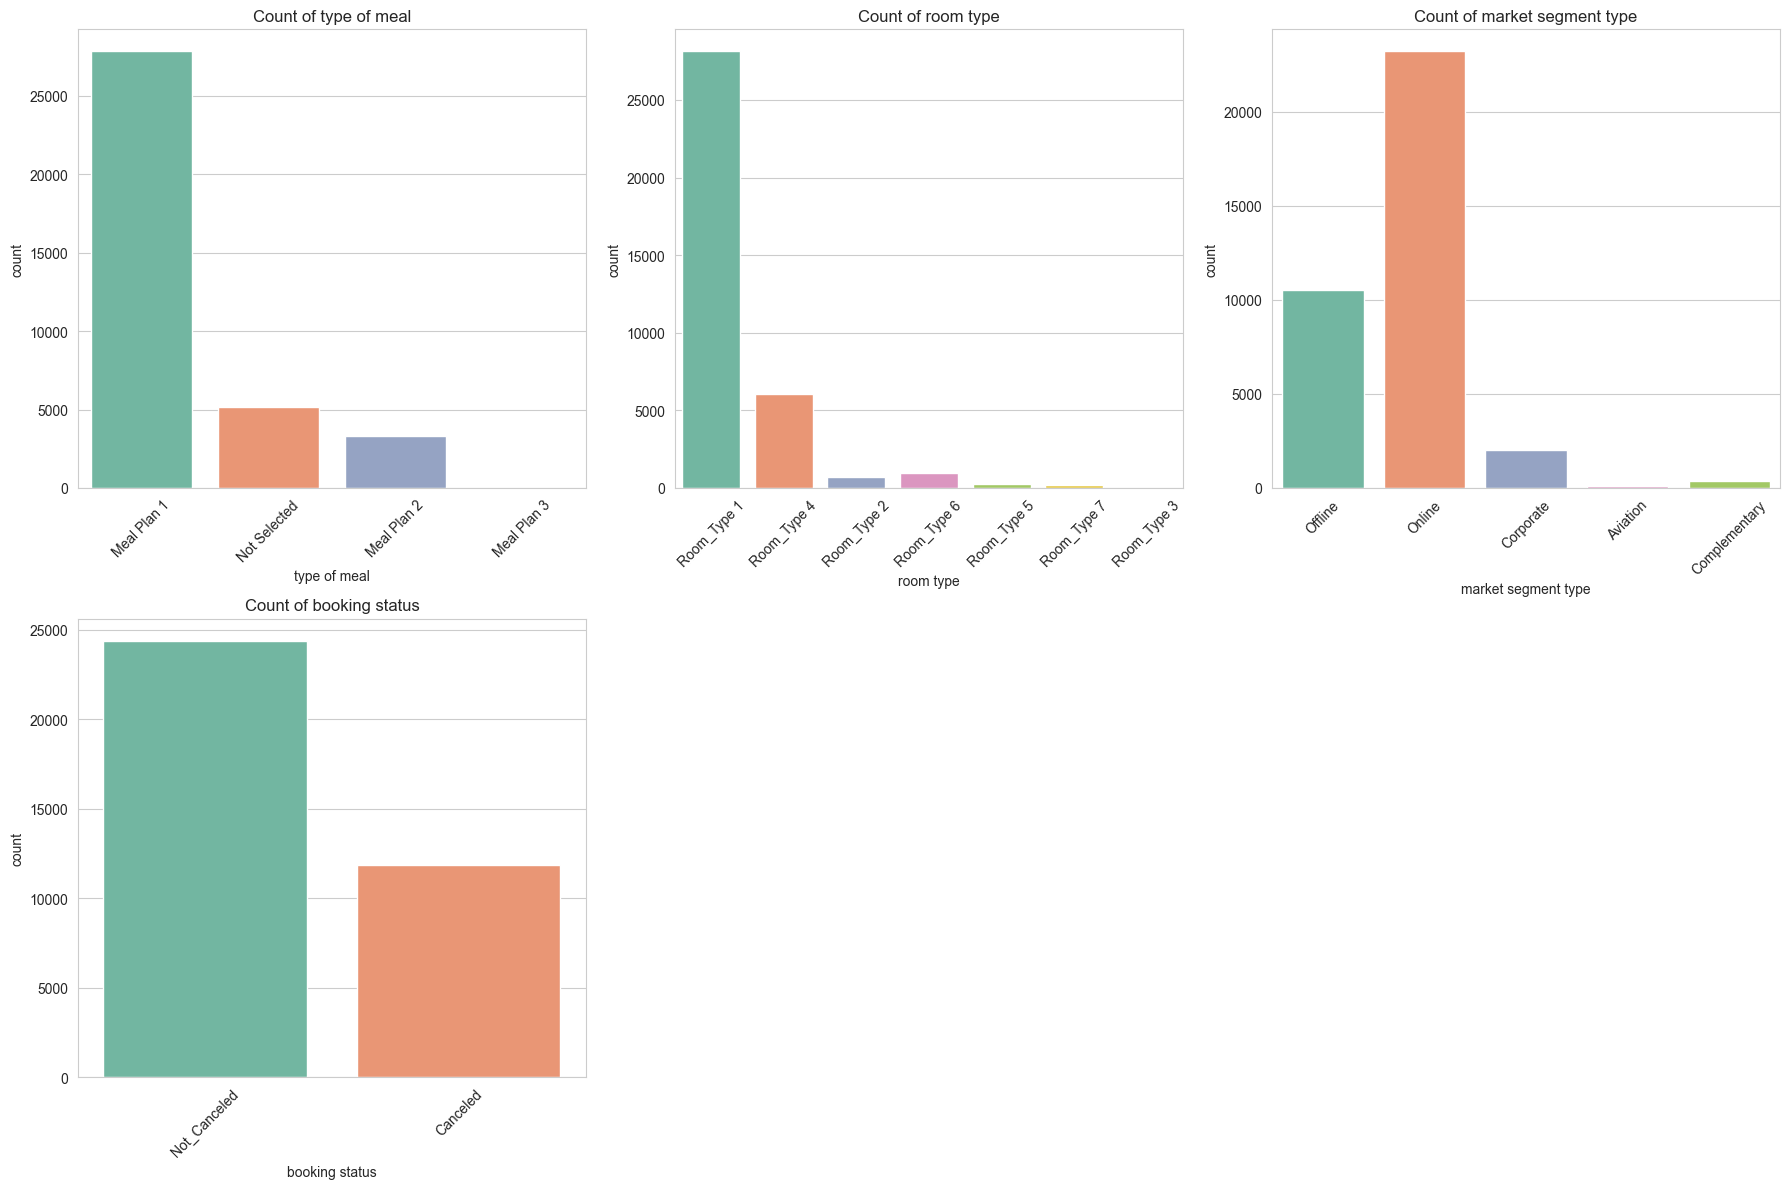

In [ ]:
# Visualize Categorical Features
cat_features = len(cat_cols)
rows = (cat_features // 3) + (cat_features % 3 > 0)  # Adjust rows dynamically
fig, axes = plt.subplots(rows, 3, figsize=(18, 12))
axes = axes.flatten()  

for i, col in enumerate(cat_cols):
    palette = sns.color_palette("Set2", n_colors=len(dataset[col].unique()))  
    sns.countplot(x=dataset[col], ax=axes[i], hue=dataset[col], palette=palette, legend=False)  
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis='x', rotation=45) 

for j in range(i + 1, len(axes)):   # Hide unused subplots if cat_features is not a multiple of 3
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()




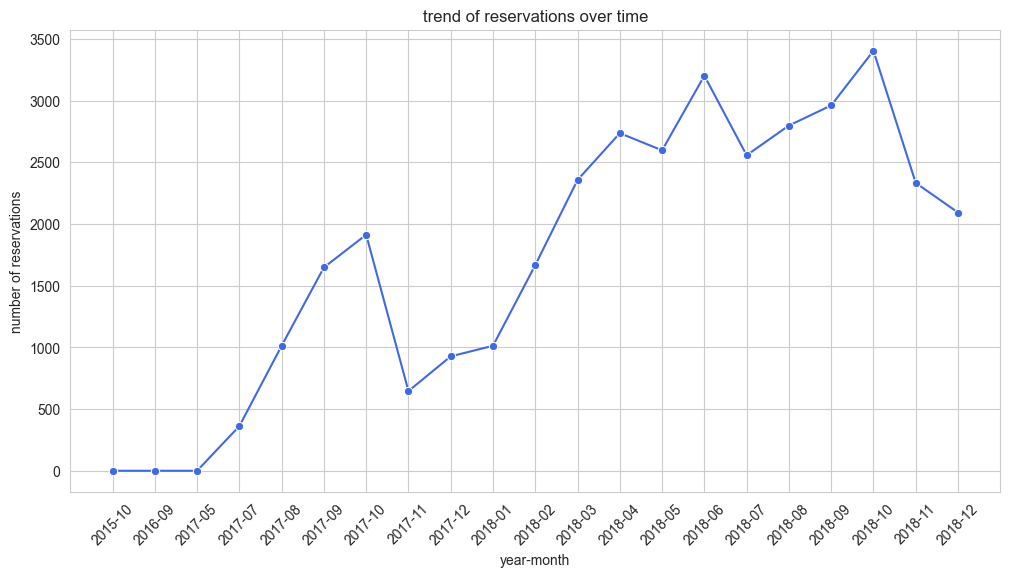

In [48]:
dataset["Year-Month"] = dataset["date of reservation"].dt.to_period("M")

monthly_reservations = dataset["Year-Month"].value_counts().sort_index()

# plot time series
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_reservations.index.astype(str), y=monthly_reservations.values, marker="o", color="royalblue")

# labels and title
plt.title("trend of reservations over time")
plt.xlabel("year-month")
plt.ylabel("number of reservations")
plt.xticks(rotation=45)

plt.show()




## 2. Handling Outliers

### A) Detecting Phase

     · Removing outliers should not be done casually and arbitrary.
     . This can lead to overconfidence in results, because we removed the relevant variability in the data.
     · Removing outliers, or minimizing their effect through Winsorization or robust techniques like using medians instead of means, should always take into account the goals of the analysis.
     · Are the outliers relevant to the question we want to answer?
     · If they are, don't just remove them! That would be silly and will give you misleading results



In [ ]:
def print_outliers_iqr(data_set, factor=1.5):  # print outliers using the IQR method and prints row count before and after removal."""
    
    
    original_shape = data_set.shape[0]  # Store original shape before removing outliers
    cleaned_data = data_set.copy()

    for col in num_cols:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]  # Remove outliers for each column

    new_shape = cleaned_data.shape[0]

    
    print(f"🔹 Rows before removing outliers: {original_shape}")
    print(f"🔹 Rows after removing outliers: {new_shape}")
    print(f"🔹 Rows removed (outliers detected): {original_shape - new_shape} \n which is {100-int((new_shape/original_shape)*100)} % from dataset")

print_outliers_iqr(dataset)

# Try to separate to get more efficiency in detection


🔹 Rows before removing outliers: 36285
🔹 Rows after removing outliers: 21189
🔹 Rows removed (outliers detected): 15096 
 which is 42 % from dataset


In [ ]:
def classify_features_by_skewness(df, threshold=0.5):
    normal_features = []
    skewed_features = []
    for column in df.select_dtypes(include=['number']).columns:  # Loop through numeric features
        skewness = df[column].skew()
        if abs(skewness) < threshold:
            normal_features.append(column)
        else:
            skewed_features.append(column)
    
    print(f"✅ Normal Features: {normal_features}")
    print(f"🚨 Skewed Features: {skewed_features}")
    
    return normal_features, skewed_features

normal_features, skewed_features = classify_features_by_skewness(dataset)    # Seperate Normal & Skewed features to apply Z-Score & IQR


✅ Normal Features: ['number of adults']
🚨 Skewed Features: ['number of children', 'number of weekend nights', 'number of week nights', 'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests']


In [ ]:
def count_total_outliers(data_set, factor=1.5): # count outliers for each skewed features using the IQR method
    total_outliers = 0

    for col in skewed_features:
        Q1 = data_set[col].quantile(0.25)
        Q3 = data_set[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        outliers = data_set[(data_set[col] < lower_bound) | (data_set[col] > upper_bound)]
        num_outliers = outliers.shape[0]

        total_outliers += num_outliers
        print(f"Outliers in Column ({col}) = {num_outliers}")

    print("=" * 40)
    print(f"🔹 Total Outliers in Dataset: {total_outliers}")

count_total_outliers(dataset)


Outliers in Column (number of children) = 2702
Outliers in Column (number of weekend nights) = 21
Outliers in Column (number of week nights) = 324
Outliers in Column (car parking space) = 1124
Outliers in Column (lead time) = 1332
Outliers in Column (repeated) = 930
Outliers in Column (P-C) = 338
Outliers in Column (P-not-C) = 812
Outliers in Column (average price ) = 1696
Outliers in Column (special requests) = 762
🔹 Total Outliers in Dataset: 10041


In [ ]:
def print_outliers_iqr(data_set, factor=1.5): #  count total outliers using the IQR method for all skewed features
    original_shape = data_set.shape[0]
    cleaned_data = data_set.copy()

    for col in skewed_features:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Remove outliers for this column
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    # Store new shape after outlier removal
    new_shape = cleaned_data.shape[0]

    # Print before & after outlier removal
    print(f"🔹 Rows before removing outliers: {original_shape}")
    print(f"🔹 Rows after removing outliers: {new_shape}")
    print(f"🔹 Rows removed (outliers detected): {original_shape - new_shape} \n which is {100-int((new_shape/original_shape)*100)} % from dataset")


# Call the function
print_outliers_iqr(dataset)

# ✅ Best For:
# Skewed distributions (e.g., prices, salaries, time intervals).
# Non-Gaussian (non-normal) data.

# Comparing btw prev code O/P (10041) & this code O/P (7360) means that Some rows are outliers in multiple columns and are counted more than once


🔹 Rows before removing outliers: 36285
🔹 Rows after removing outliers: 28925
🔹 Rows removed (outliers detected): 7360 
 which is 21 % from dataset


In [ ]:
def print_outliers_zscore(data, threshold=3):        #  count total outliers using the Zscore method for all normal features
    z_scores = np.abs(zscore(data[normal_features]))
    filtered_data = data[(z_scores < threshold).all(axis=1)]
    
    print(f"🔹 Rows before removing outliers: {data.shape[0]}")
    print(f"🔹 Rows after removing outliers: {filtered_data.shape[0]}")
    print(f"🔹 Rows removed: {data.shape[0] - filtered_data.shape[0]} \n which is {100-int((filtered_data.shape[0]/data.shape[0])*100)} % from dataset")


print_outliers_zscore(dataset)

# ✅ Best For:
# Normally distributed data.
# When the dataset size is large (outliers don’t heavily impact the mean).


🔹 Rows before removing outliers: 36285
🔹 Rows after removing outliers: 36130
🔹 Rows removed: 155 
 which is 1 % from dataset


### B) Visulaizing before Treatment

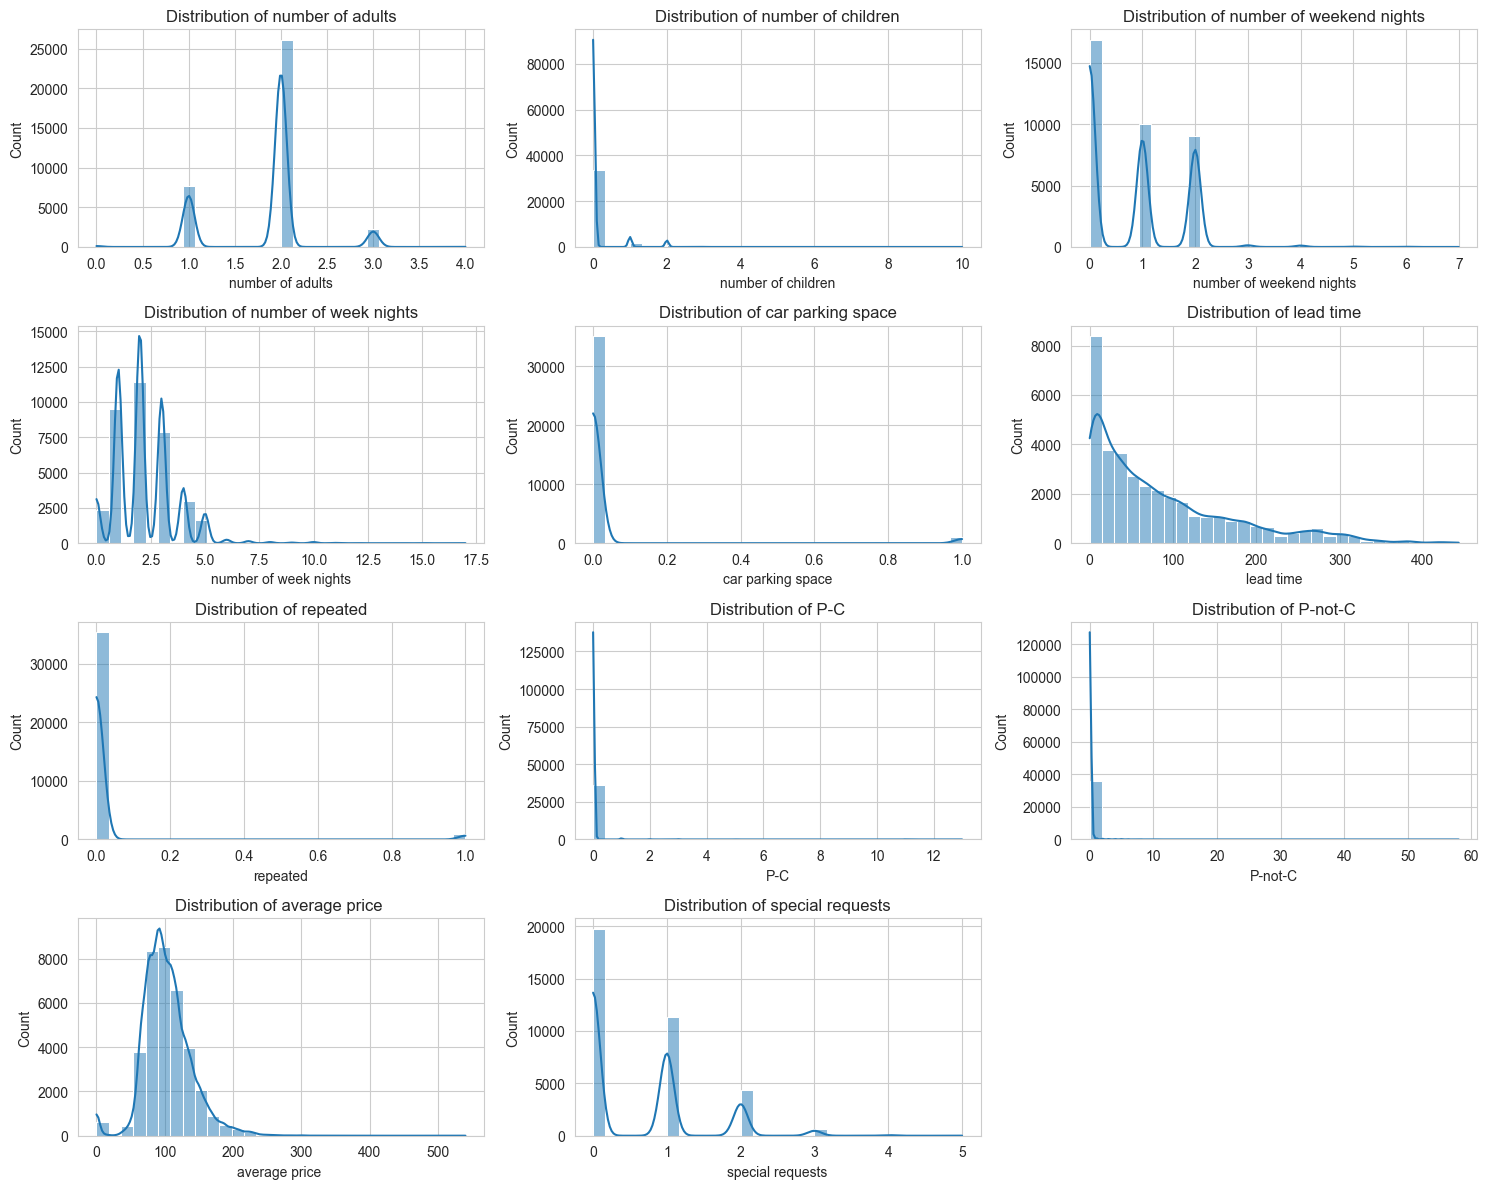

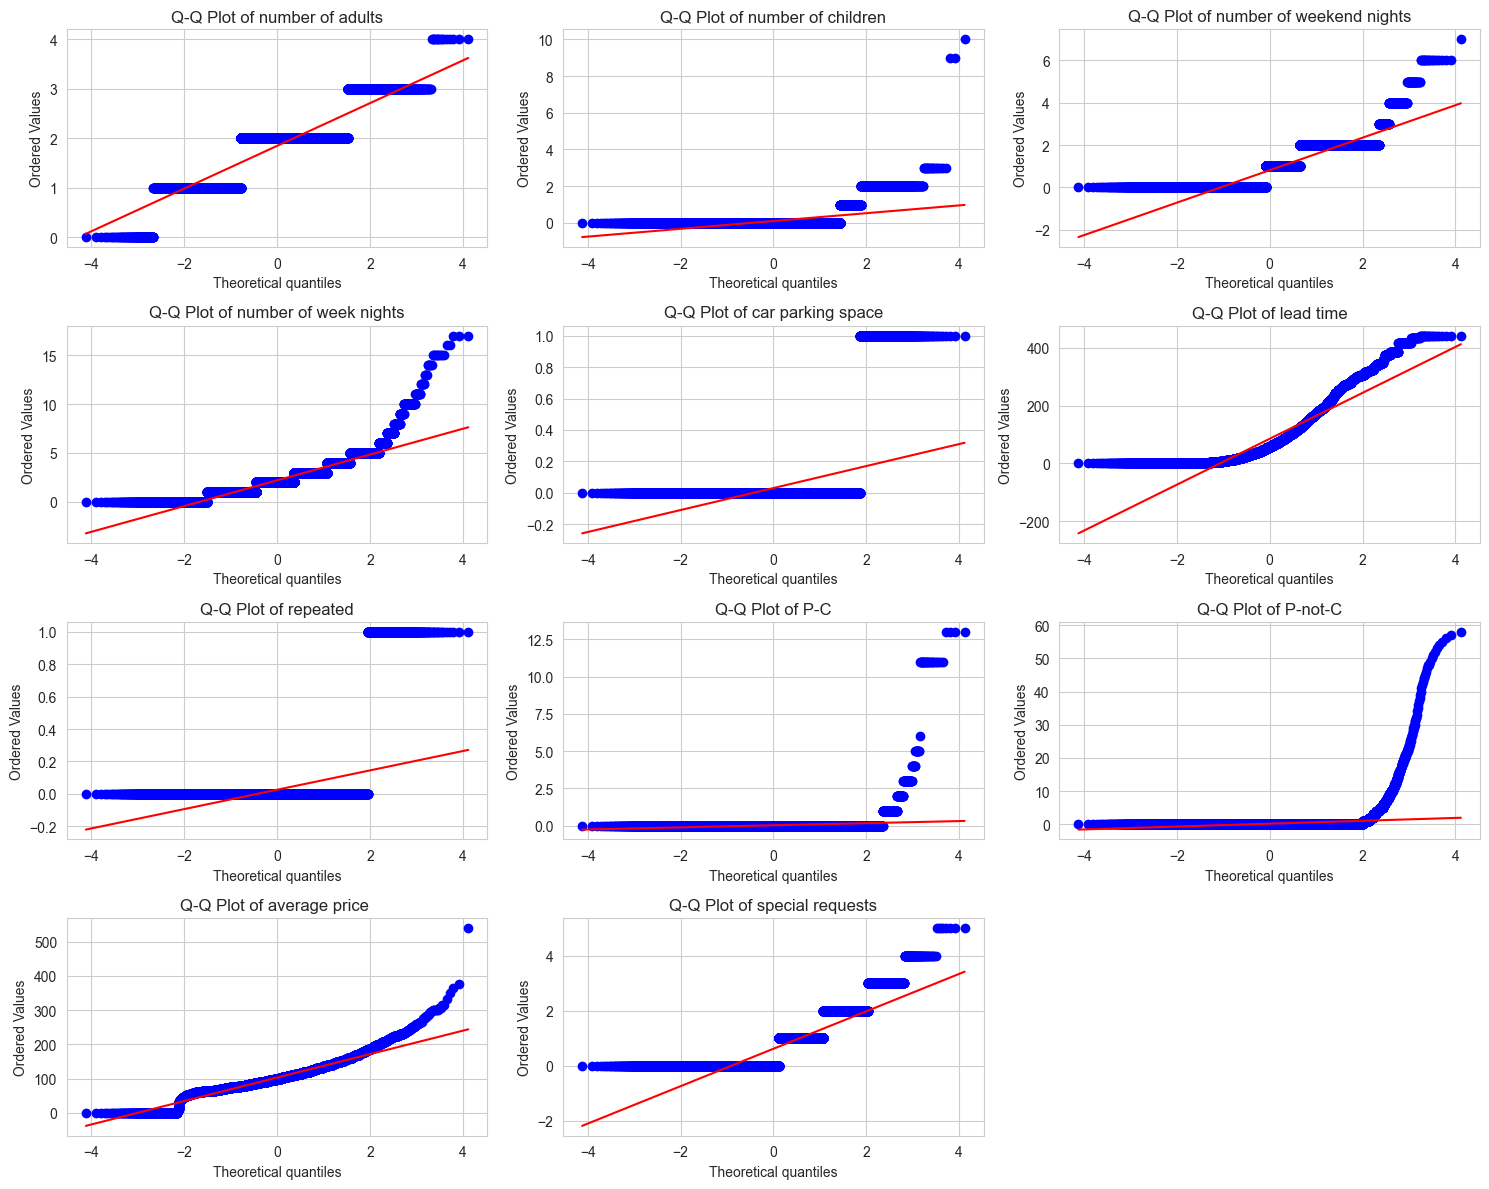

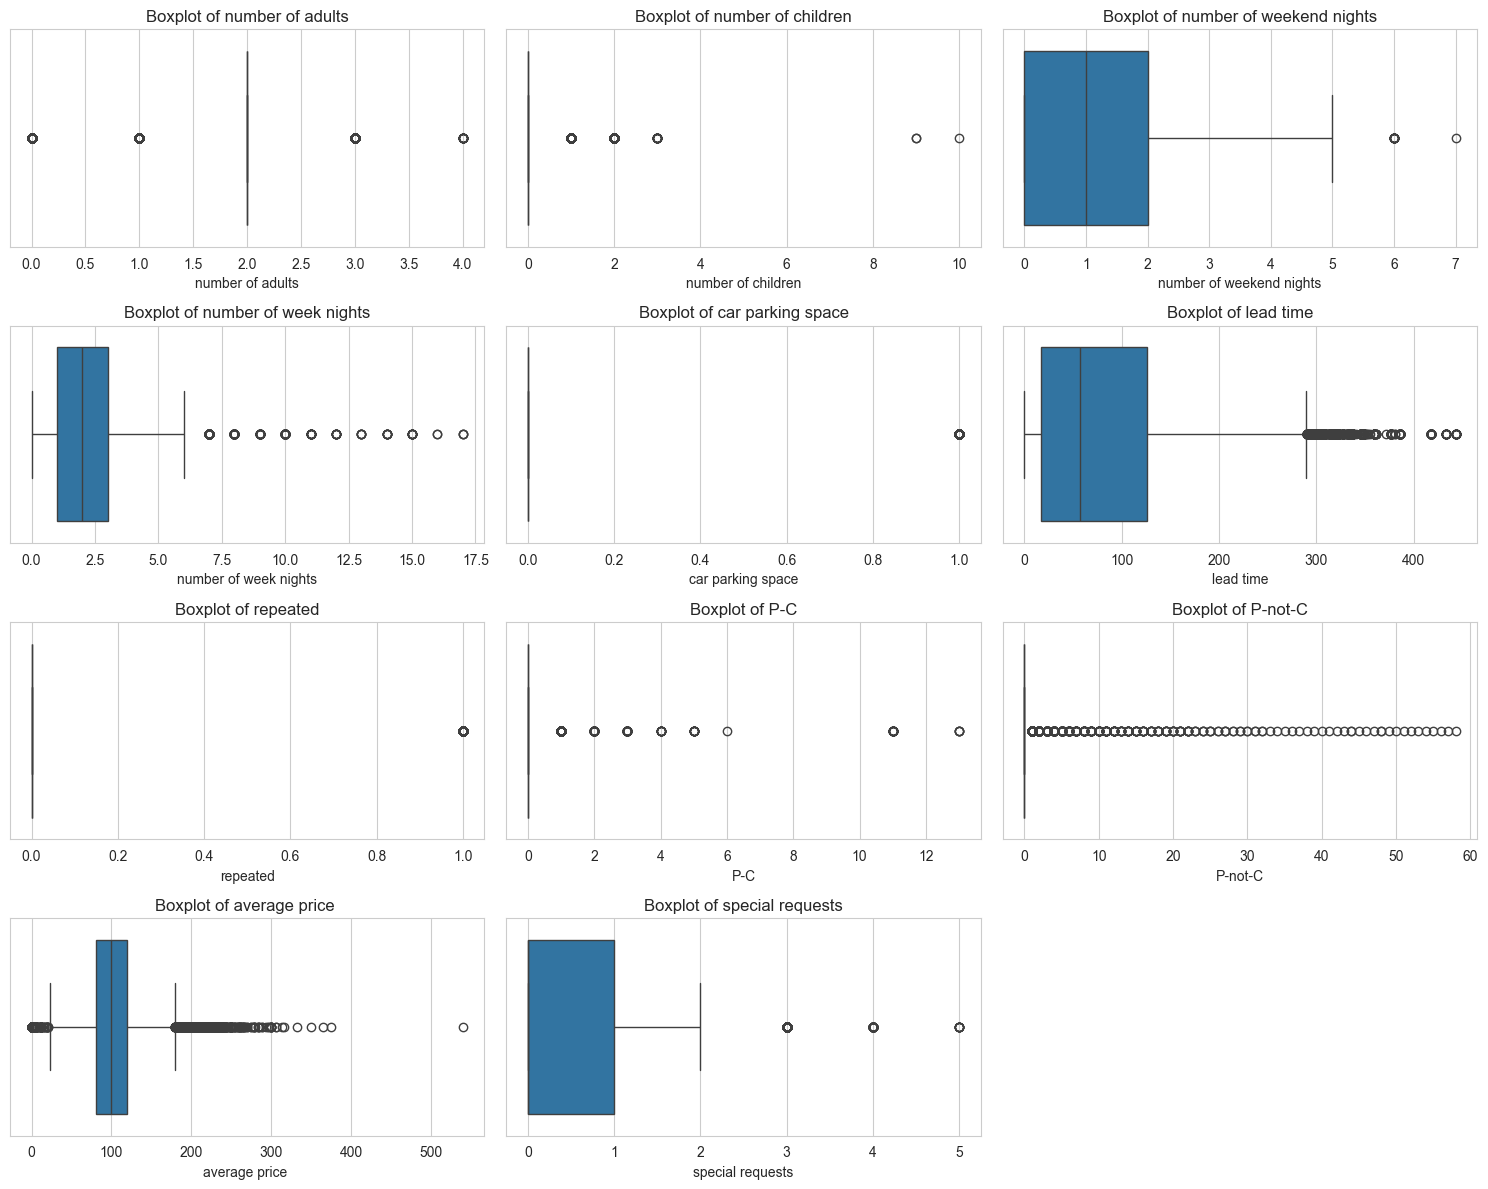

In [ ]:

plt.figure(figsize=(15, 12))

# Plot histograms for each numerical feature
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)  
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Q-Q Plots to check for normality
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    stats.probplot(dataset[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

# Box plots to detect extreme values
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


### C) Treatment phase

In [55]:
dataset_treated= dataset.copy()

In [ ]:
def detect_skewness_and_suggest_transformation(data, threshold=0.5):    # Type of skewness to be treated
    skew_info = {}

    # Loop through numerical skewed features
    for col in skewed_features:
        skewness = data[col].skew()

        if abs(skewness) < threshold:
            suggestion = "No transformation needed (approximately normal)"
        elif skewness > 0:
            suggestion = "Right-skewed → Try Log, Square Root, or Box-Cox"
        else:
            suggestion = "Left-skewed → Try Exponential or Box-Cox transformation"

        skew_info[col] = {"Skewness": round(skewness, 3), "Suggestion": suggestion}

    skew_df = pd.DataFrame.from_dict(skew_info, orient='index')  # Convert results to DataFrame for better readability
    return skew_df

skewness_results = detect_skewness_and_suggest_transformation(dataset_treated)
print(skewness_results)



                          Skewness  \
number of children           4.708   
number of weekend nights     0.738   
number of week nights        1.599   
car parking space            5.414   
lead time                    1.292   
repeated                     6.004   
P-C                         25.203   
P-not-C                     19.253   
average price                0.667   
special requests             1.145   

                                                               Suggestion  
number of children        Right-skewed → Try Log, Square Root, or Box-Cox  
number of weekend nights  Right-skewed → Try Log, Square Root, or Box-Cox  
number of week nights     Right-skewed → Try Log, Square Root, or Box-Cox  
car parking space         Right-skewed → Try Log, Square Root, or Box-Cox  
lead time                 Right-skewed → Try Log, Square Root, or Box-Cox  
repeated                  Right-skewed → Try Log, Square Root, or Box-Cox  
P-C                       Right-skewed → Try Log,

In [ ]:
def log_sqrt_transform(dataset, column):            # Apply log transformation first, then square root for further normalization
    dataset[column] = np.log1p(dataset[column])     # Log transformation
    dataset[column] = np.sqrt(dataset[column])      # Additional smoothing
    return dataset

right_skewed_features = ["special requests"]

# Apply Box-Cox (requires positive values)
dataset_treated["P-C"], lambda_pc = boxcox(dataset_treated["P-C"] + 1)  # adding 1 to avoid zero values
dataset_treated["P-not-C"], lambda_pnc = boxcox(dataset_treated["P-not-C"] + 1)
dataset_treated["number of children"], lambda_pc = boxcox(dataset_treated["number of children"] + 1)

for col in right_skewed_features:
    numeric_dataset = log_sqrt_transform(dataset_treated, col)

dataset_treated[numeric_dataset.columns] = numeric_dataset  # Update numeric columns

print("🔹 Final Adjusted Feature Skewness:\n", dataset_treated[skewed_features].skew())


🔹 Final Adjusted Feature Skewness:
 number of children           3.241954
number of weekend nights     0.737636
number of week nights        1.598685
car parking space            5.414464
lead time                    1.292436
repeated                     6.003783
P-C                         10.216169
P-not-C                      6.458506
average price                0.667186
special requests             0.271214
dtype: float64


### D) Visualize After treatment

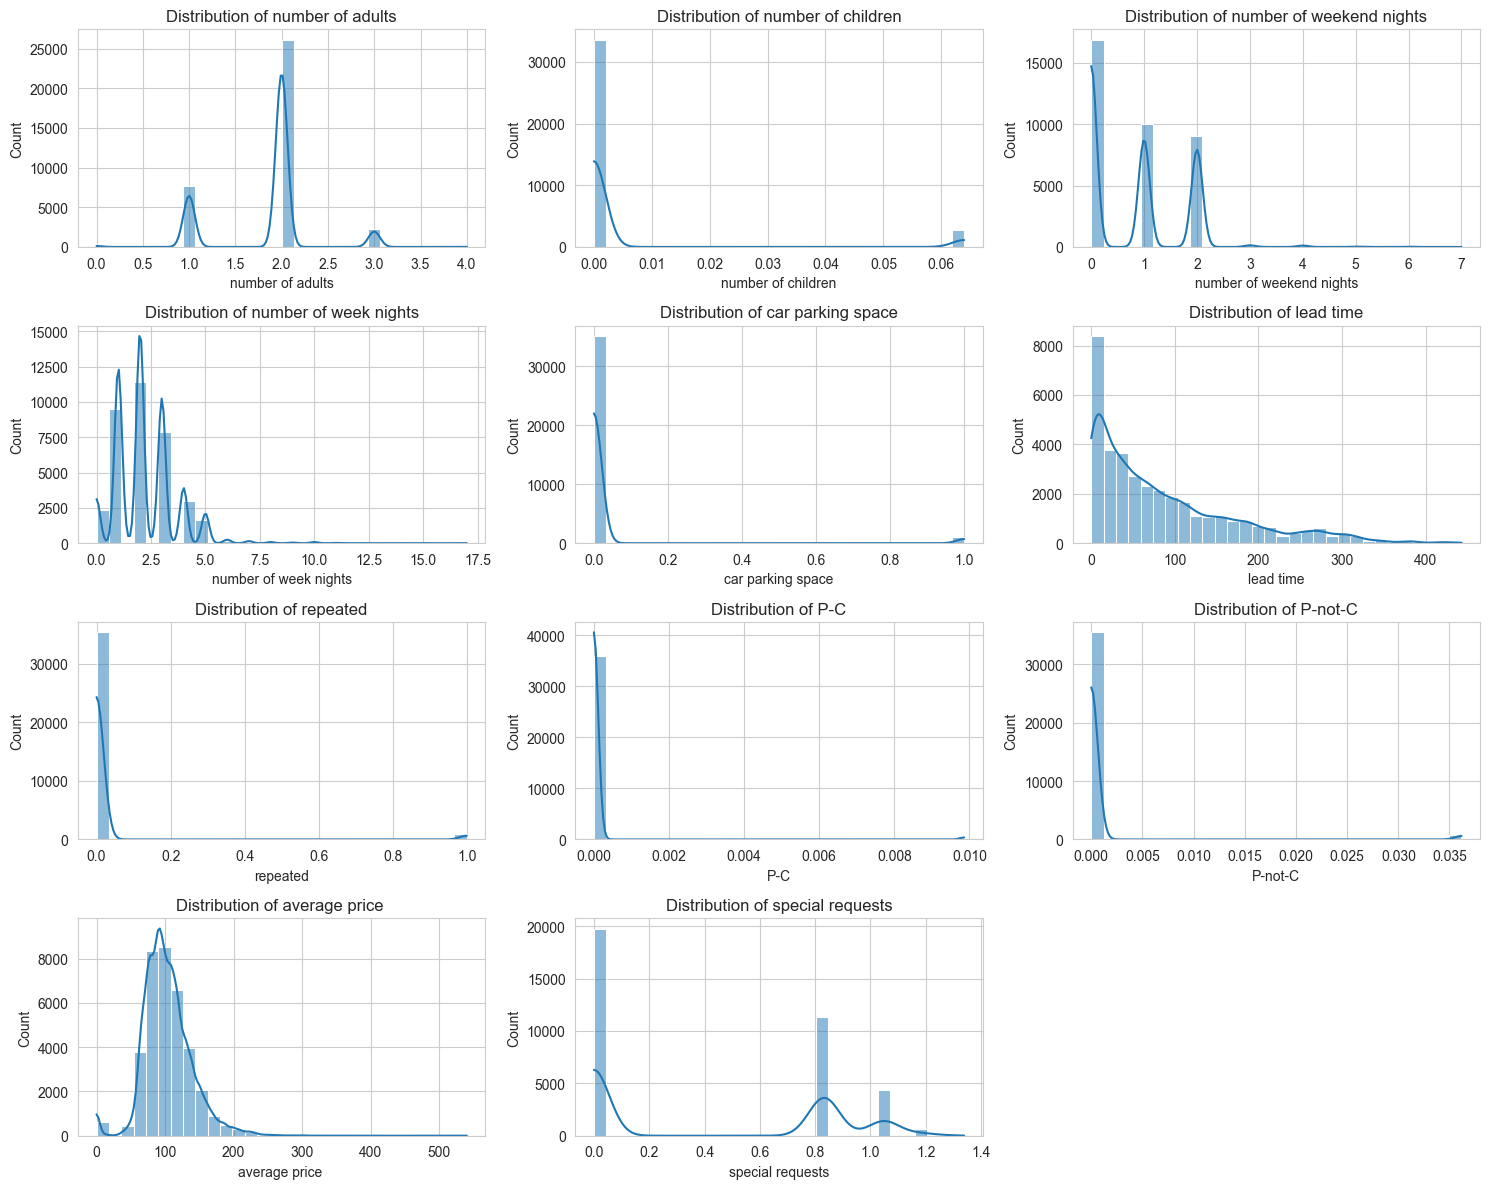

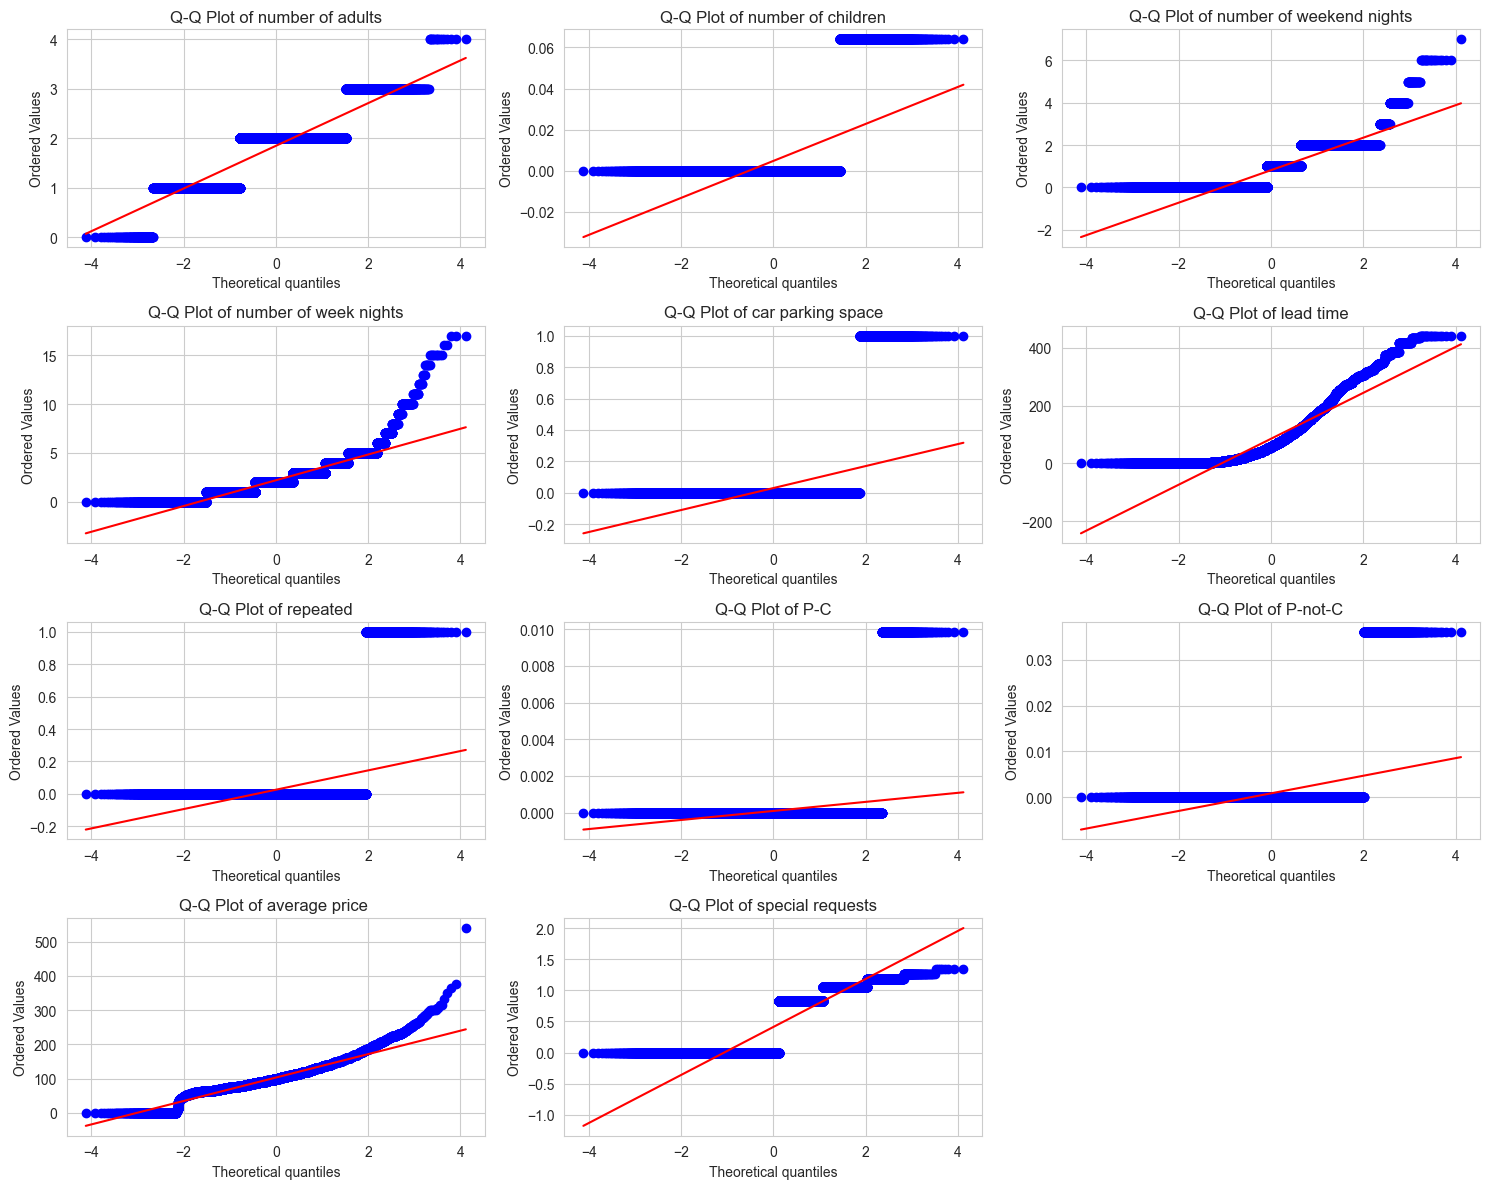

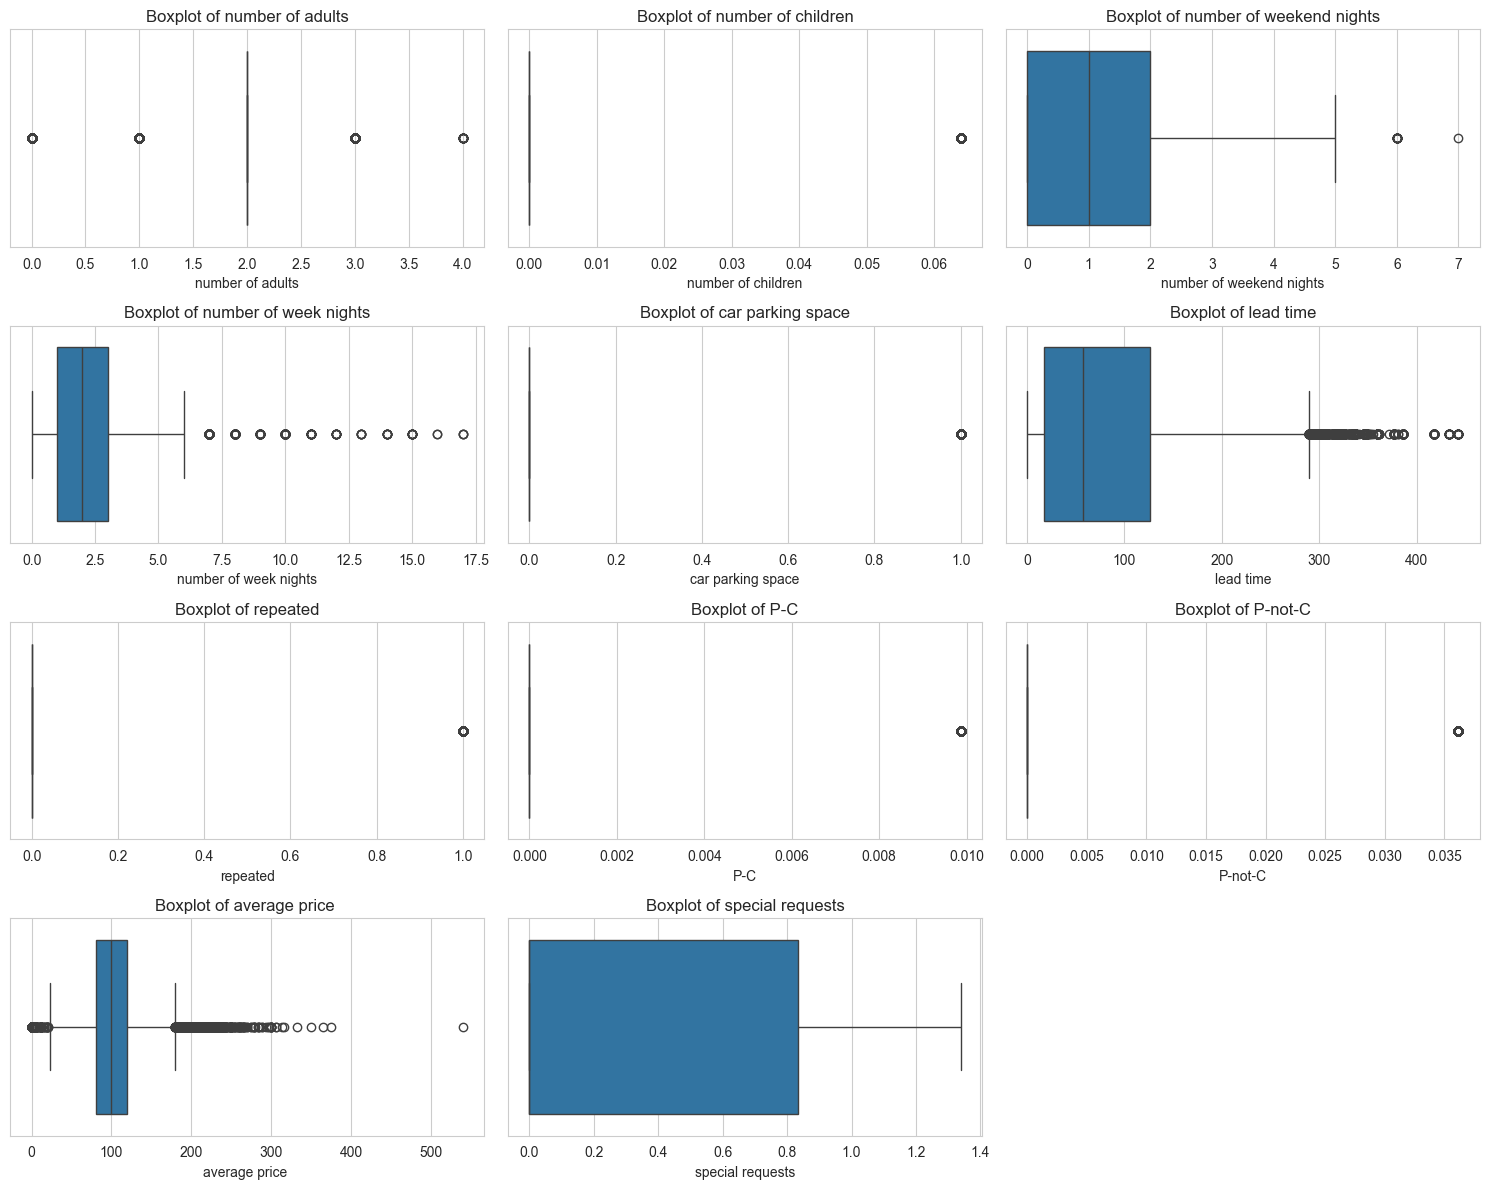

In [ ]:

plt.figure(figsize=(15, 12))

# Plot histograms for each numerical feature
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)  
    sns.histplot(dataset_treated[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Q-Q Plots to check for normality
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    stats.probplot(dataset_treated[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

# Box plots to detect extreme values
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=dataset_treated[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


## 3. Feature Engineering

### A) Visualize Features with target

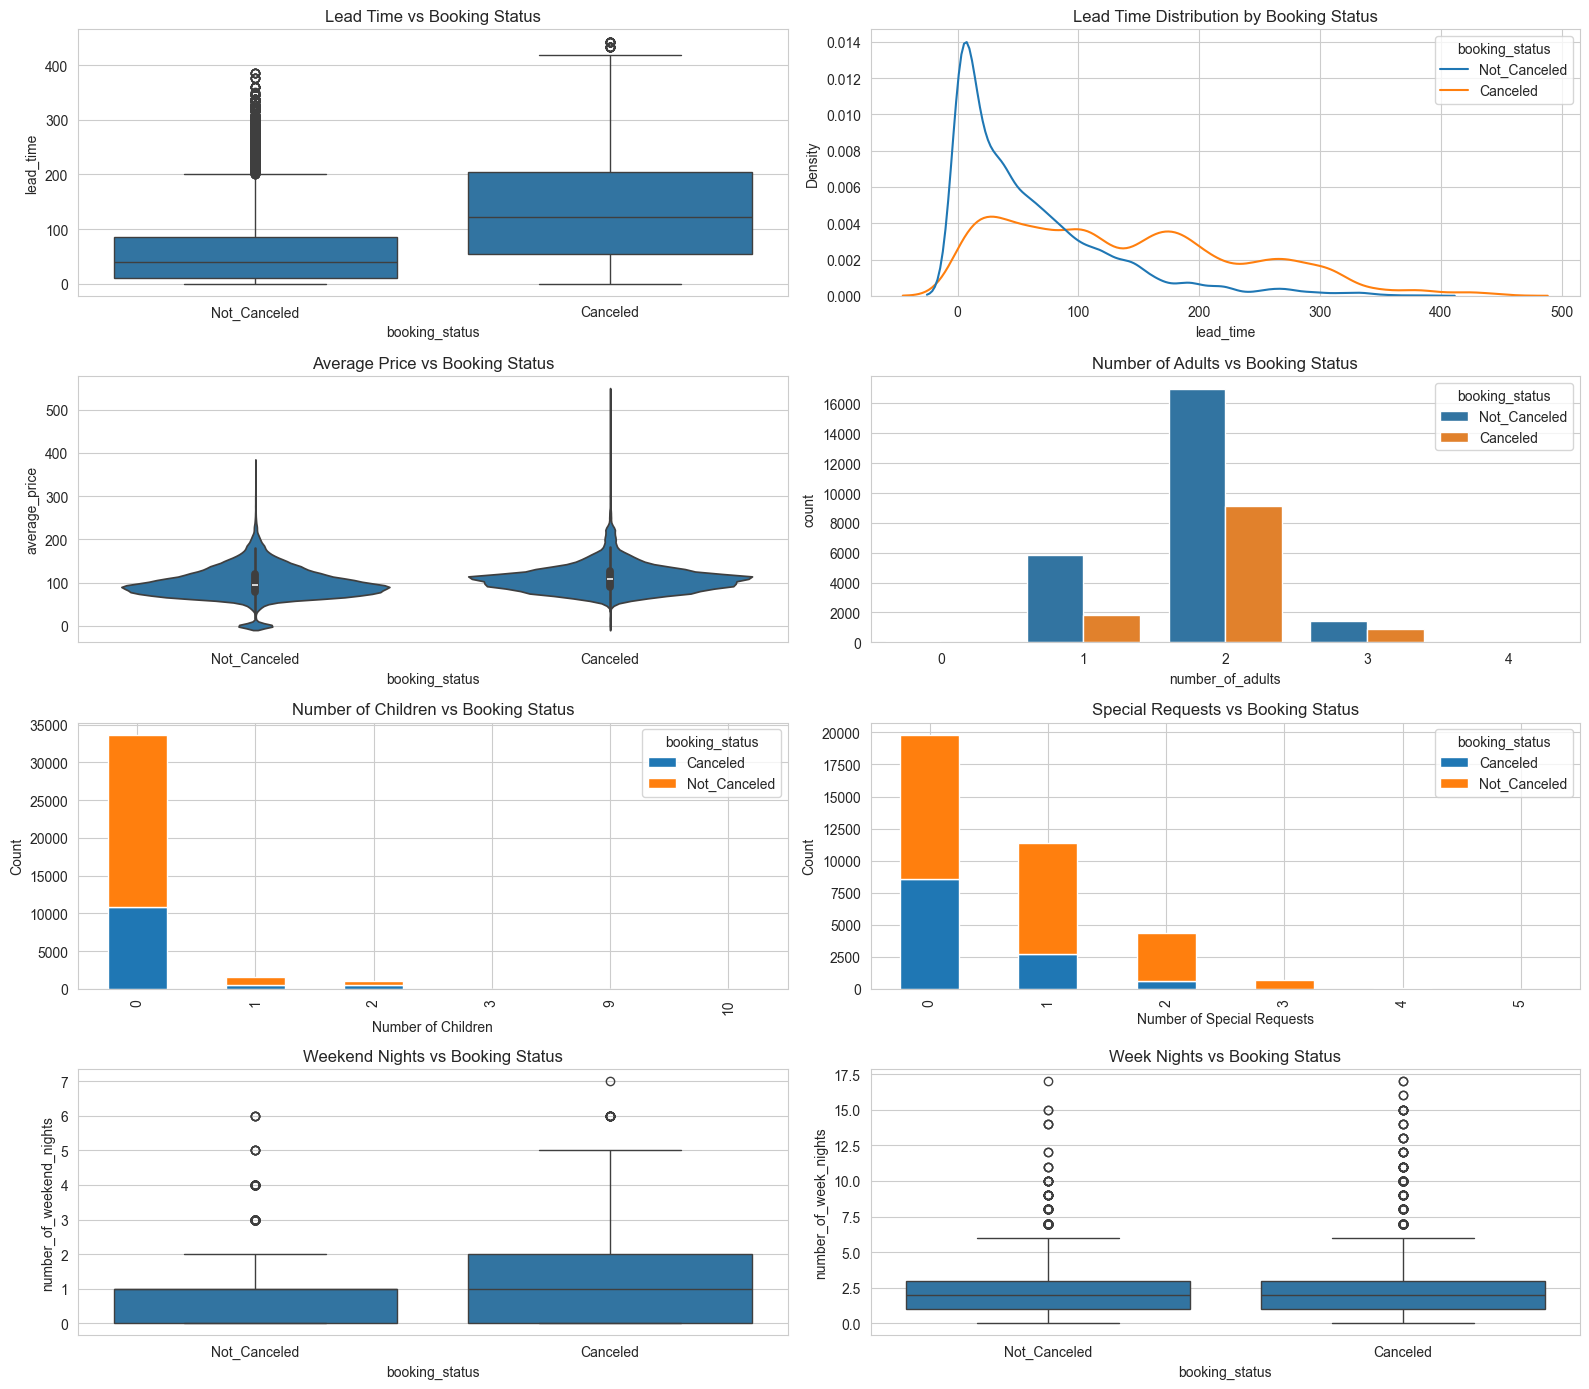

In [ ]:
# Numerical Features
df_copy=dataset.copy()
sns.set_style("whitegrid")

df_copy.columns = df_copy.columns.str.strip().str.lower().str.replace(" ", "_")

fig, axes = plt.subplots(4, 2, figsize=(16, 14))

# Booking Status & Lead Time --------------------
sns.boxplot(x="booking_status", y="lead_time", data=df_copy, ax=axes[0, 0])
axes[0, 0].set_title("Lead Time vs Booking Status")

sns.kdeplot(data=df_copy, x="lead_time", hue="booking_status", common_norm=False, ax=axes[0, 1])
axes[0, 1].set_title("Lead Time Distribution by Booking Status")

# Booking Status & Average Price --------------------
sns.violinplot(x="booking_status", y="average_price", data=df_copy, ax=axes[1, 0])
axes[1, 0].set_title("Average Price vs Booking Status")

# Booking Status & Number of Adults --------------------
sns.countplot(x="number_of_adults", hue="booking_status", data=df_copy, ax=axes[1, 1])
axes[1, 1].set_title("Number of Adults vs Booking Status")

# Booking Status & Number of Children --------------------
child_status = df_copy.groupby(["number_of_children", "booking_status"]).size().unstack(fill_value=0)
child_status.plot(kind="bar", stacked=True, ax=axes[2, 0])
axes[2, 0].set_title("Number of Children vs Booking Status")
axes[2, 0].set_xlabel("Number of Children")
axes[2, 0].set_ylabel("Count")

# Booking Status & Special Requests --------------------
request_status = df_copy.groupby(["special_requests", "booking_status"]).size().unstack(fill_value=0)
request_status.plot(kind="bar", stacked=True, ax=axes[2, 1])
axes[2, 1].set_title("Special Requests vs Booking Status")
axes[2, 1].set_xlabel("Number of Special Requests")
axes[2, 1].set_ylabel("Count")

# Booking Status & Number of Weekend Nights --------------------
sns.boxplot(x="booking_status", y="number_of_weekend_nights", data=df_copy, ax=axes[3, 0])
axes[3, 0].set_title("Weekend Nights vs Booking Status")

# Booking Status & Number of Week Nights --------------------
sns.boxplot(x="booking_status", y="number_of_week_nights", data=df_copy, ax=axes[3, 1])
axes[3, 1].set_title("Week Nights vs Booking Status")

plt.tight_layout()
plt.show()


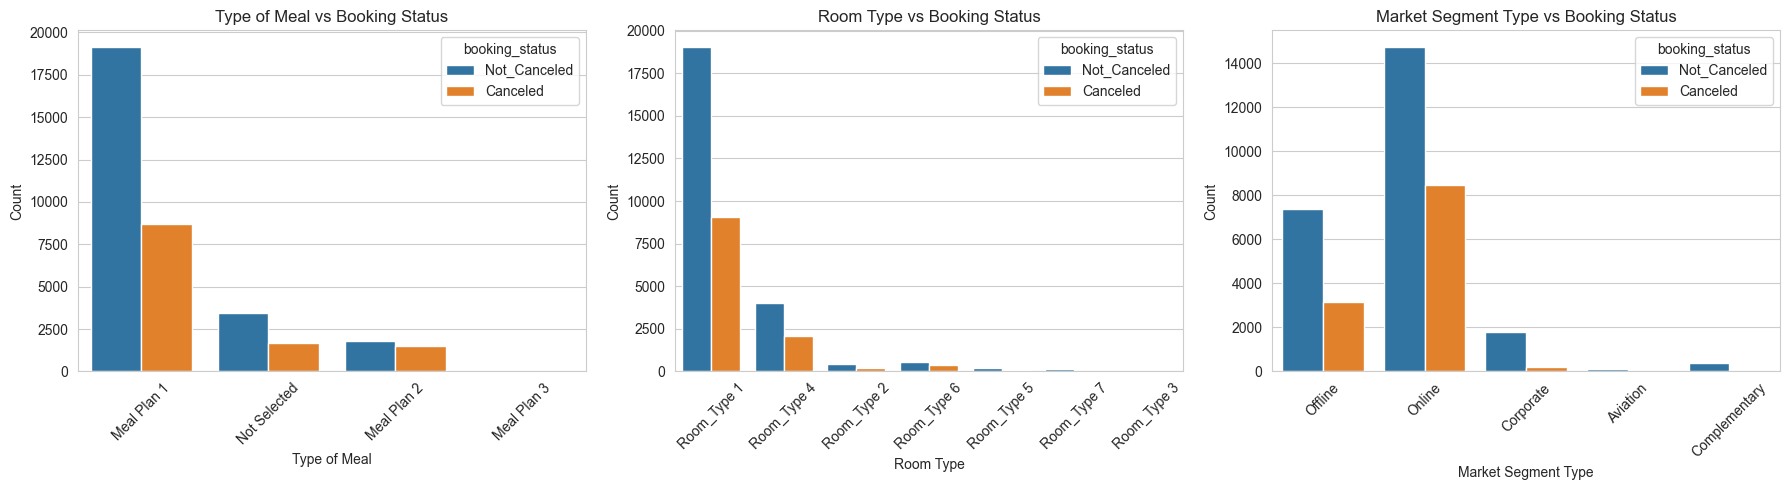

In [ ]:
# Categorical Features
df_copy.columns = df_copy.columns.str.strip().str.lower().str.replace(" ", "_")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Booking Status & Type of Meal --------------------
sns.countplot(x="type_of_meal", hue="booking_status", data=df_copy, ax=axes[0])
axes[0].set_title("Type of Meal vs Booking Status")
axes[0].set_xlabel("Type of Meal")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Booking Status & Room Type --------------------
sns.countplot(x="room_type", hue="booking_status", data=df_copy, ax=axes[1])
axes[1].set_title("Room Type vs Booking Status")
axes[1].set_xlabel("Room Type")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Booking Status & Market Segment Type --------------------
sns.countplot(x="market_segment_type", hue="booking_status", data=df_copy, ax=axes[2])
axes[2].set_title("Market Segment Type vs Booking Status")
axes[2].set_xlabel("Market Segment Type")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### B) Insights Investigation

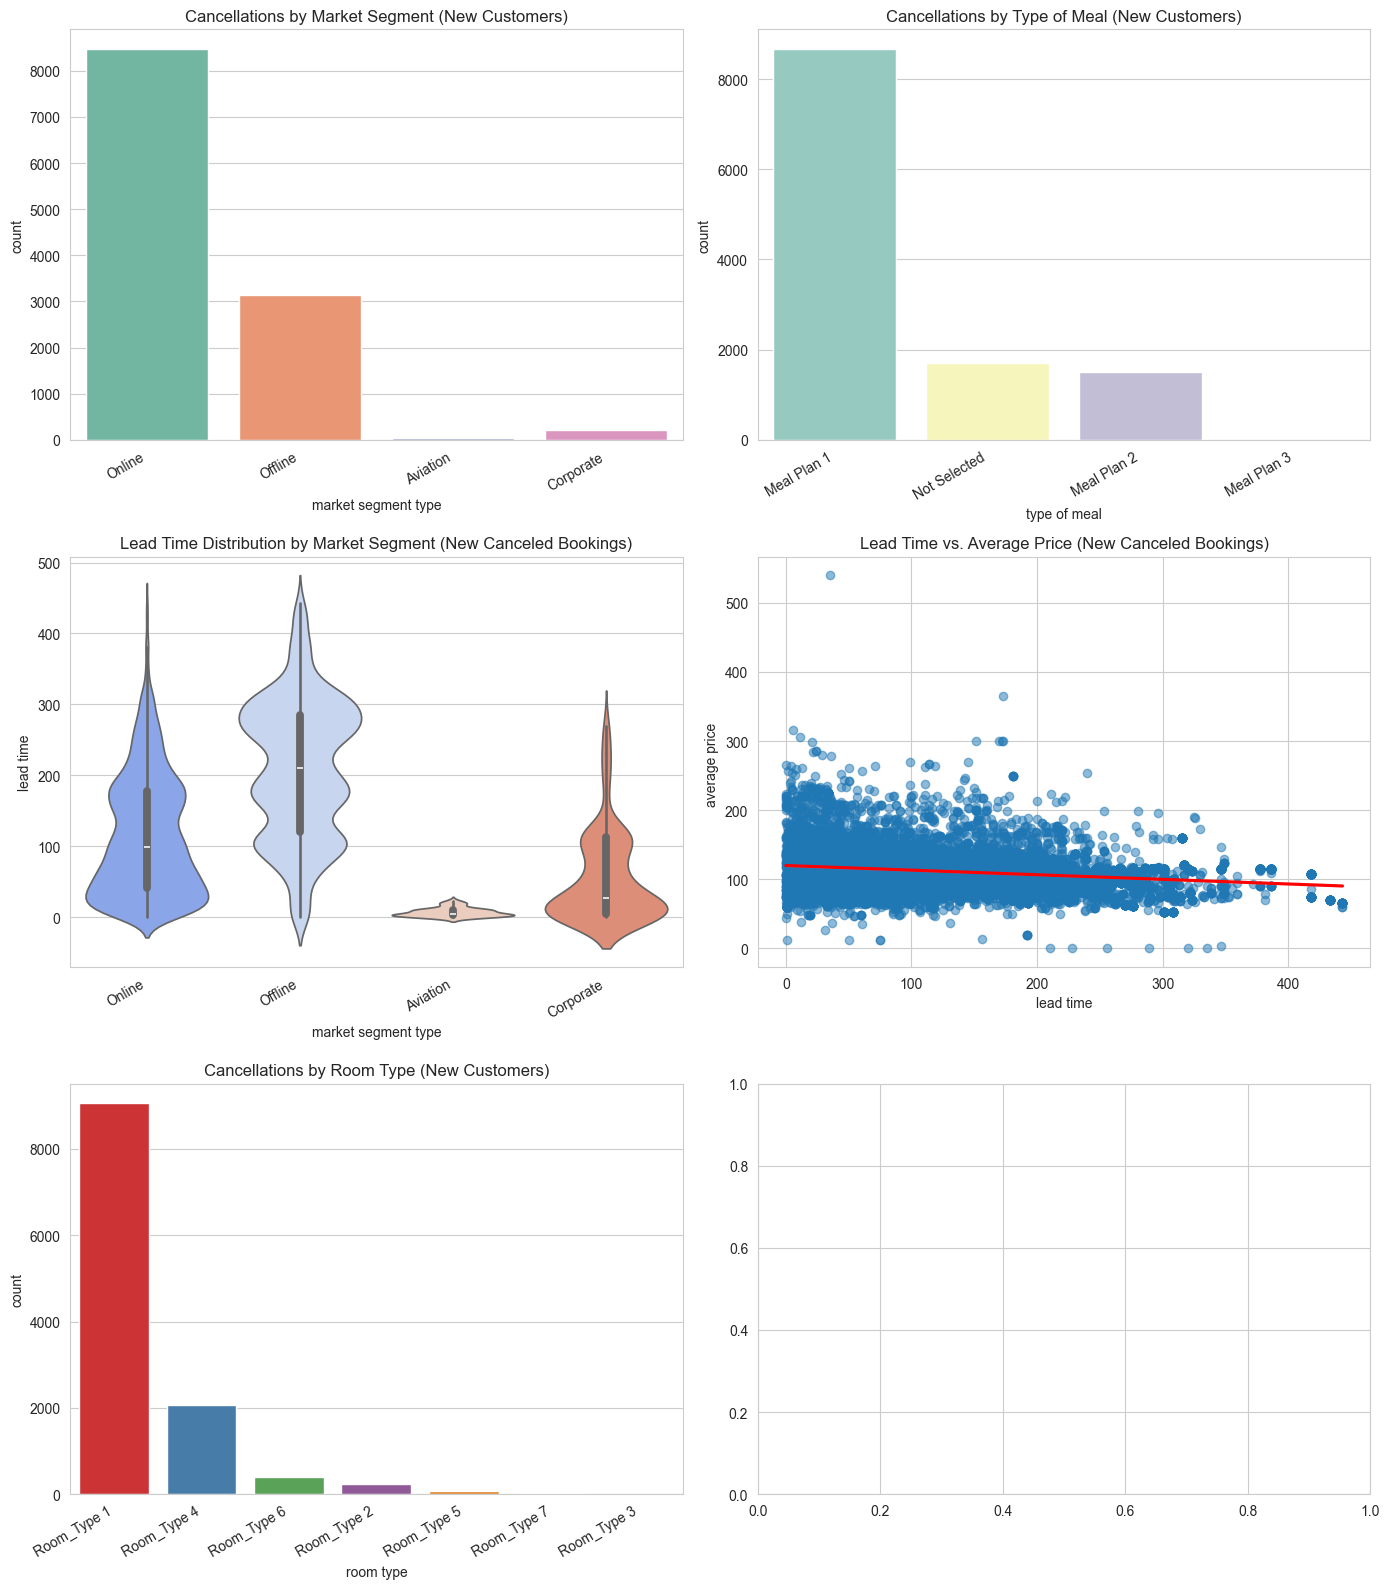

In [ ]:

data=dataset.copy()
canceled_new_customers = data[(data["repeated"] == 0) & (data["booking status"] == "Canceled")]  # Focus on new customers (Repeated = 0) who canceled bookings

fig, axes = plt.subplots(3, 2, figsize=(14, 16))

# Market Segment vs Cancellations (Bar Chart)
sns.countplot(x="market segment type", data=canceled_new_customers, palette="Set2", ax=axes[0, 0])
axes[0, 0].set_title("Cancellations by Market Segment (New Customers)")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=30, ha="right")

# Type of Meal vs Cancellations (Bar Chart)
sns.countplot(x="type of meal", data=canceled_new_customers, palette="Set3", ax=axes[0, 1])
axes[0, 1].set_title("Cancellations by Type of Meal (New Customers)")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=30, ha="right")

# Lead Time Distribution by Market Segment (Violin Plot)
sns.violinplot(x="market segment type", y="lead time", data=canceled_new_customers, palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Lead Time Distribution by Market Segment (New Canceled Bookings)")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=30, ha="right")

# Lead Time vs Average Price (Scatter Plot with Trend Line)
sns.regplot(x="lead time", y="average price ", data=canceled_new_customers, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[1, 1])
axes[1, 1].set_title("Lead Time vs. Average Price (New Canceled Bookings)")

# Room Type vs Cancellations (Bar Chart)
sns.countplot(x="room type", data=canceled_new_customers, palette="Set1", ax=axes[2, 0])
axes[2, 0].set_title("Cancellations by Room Type (New Customers)")
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=30, ha="right")

plt.tight_layout()
plt.show()



# #-------------------Insights------------------------#
# Market Segment Insights:
# Customers booking online might be more price-sensitive or less committed, leading to a higher cancellation rate. 
# Offline bookings may involve in-person commitment or deposits, reducing cancellations.
#  Aviation and Corporate segments have very few : These bookings are more stable or They may have stricter cancellation policies or contractual agreements.

# Type of Meal Inights: 
# Meal Plan 1 is a default or most common option, its high cancellations may just reflect its popularity.
# Check if Online Market Segment is correlated with Meal Plan 1 cancellations.

# segment vs. Lead Time:
# Online and Offline markets show a higher tendency for cancellations across various lead times.
# Aviation and Corporate segments have shorter and more stable booking periods.

# Pricing vs. Lead Time:
# Early bookings generally result in lower prices, but short-notice bookings can be more expensive and volatile.
# While there’s a trend of decreasing prices with longer lead times, it’s not strong enough to be the sole pricing factor.

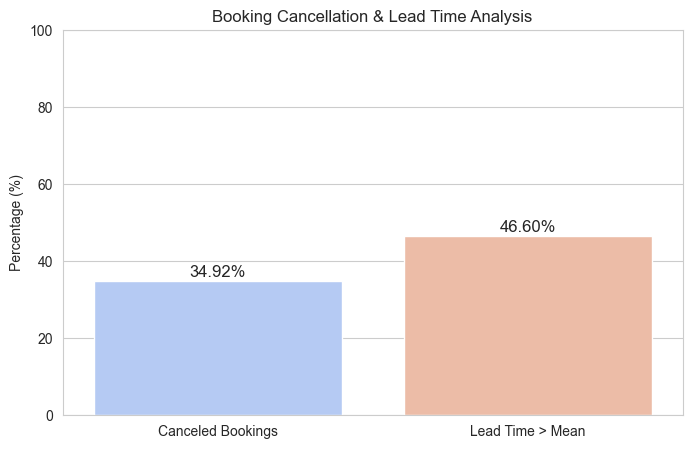

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

data["total_people"] = data["number of adults"] + data["number of children"]
data["total_nights"] = data["number of weekend nights"] + data["number of week nights"]

mean_lead_time = data["lead time"].mean()
mean_total_nights = data["total_nights"].mean()
mean_total_people = data["total_people"].mean()

filtered_df = data[
    (data["total_nights"] > mean_total_nights) &        # Filter bookings exceeding the mean values for total nights and total people
    (data["total_people"] > mean_total_people)
]

canceled_percentage = (filtered_df["booking status"].eq("Canceled").sum() / len(filtered_df)) * 100
                                                                                                                 # get Percentage
lead_time_exceed_percentage = (filtered_df["lead time"] > mean_lead_time).sum() / len(filtered_df) * 100

categories = ["Canceled Bookings", "Lead Time > Mean"]
percentages = [canceled_percentage, lead_time_exceed_percentage]


plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=percentages, palette="coolwarm")
plt.ylabel("Percentage (%)")
plt.title("Booking Cancellation & Lead Time Analysis")
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)

plt.ylim(0, 100)
plt.show()


# #------------------Insights---------------------------#
# Canceled Bookings (34.92%) – The percentage of bookings that were canceled when both total nights and total people exceeded their mean values.
# Lead Time > Mean (46.60%) – The percentage of bookings where the lead time exceeded its mean under the same conditions

#### B.1) Focus on Online cancellations

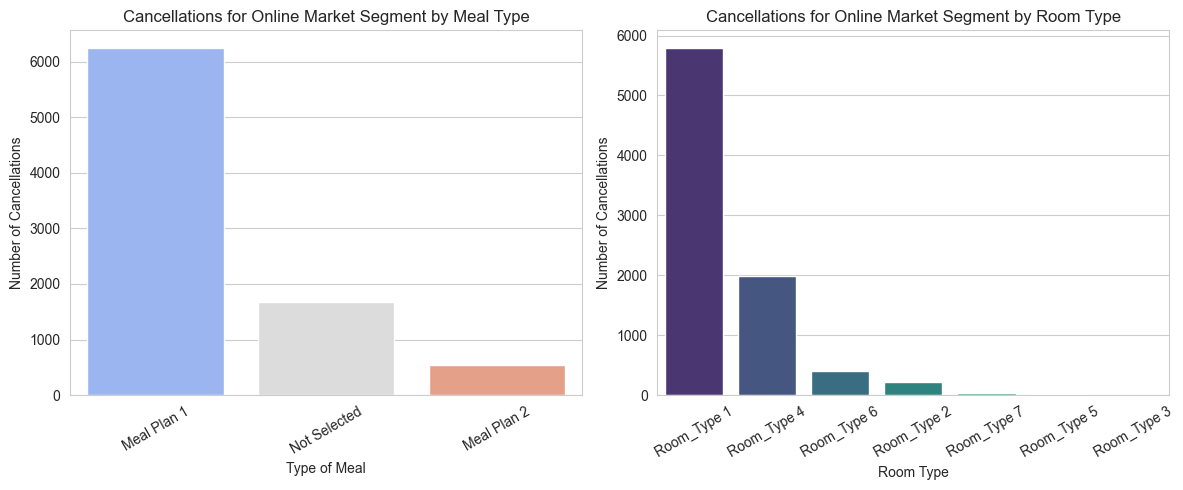

In [ ]:


canceled_new_customers = data[(data["booking status"] == "Canceled") & (data["repeated"] == 0)]       # Filter dataset for only canceled bookings of new customers

online_customers = canceled_new_customers[canceled_new_customers["market segment type"] == "Online"]  # Filter for only (Online) market segment


meal_counts = online_customers["type of meal"].value_counts()

room_counts = online_customers["room type"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Meal Plan Cancellations
sns.barplot(x=meal_counts.index, y=meal_counts.values, palette="coolwarm", ax=axes[0])
axes[0].set_title("Cancellations for Online Market Segment by Meal Type")
axes[0].set_xlabel("Type of Meal")
axes[0].set_ylabel("Number of Cancellations")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)

# Plot Room Type Cancellations
sns.barplot(x=room_counts.index, y=room_counts.values, palette="viridis", ax=axes[1])
axes[1].set_title("Cancellations for Online Market Segment by Room Type")
axes[1].set_xlabel("Room Type")
axes[1].set_ylabel("Number of Cancellations")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()



# #-------------------------Insights----------------------#
# Marketing or Booking Trends: If Meal Plan 1 & Room 1 is the default or most promoted option, more people choose it—but also cancel more.
# Customers booking Meal Plan 1 and Room Type 1 are more likely to cancel.
# Hotels should investigate whether pricing, quality, or availability impacts these cancellations.
# Offering flexible pricing or promotions on Meal Plan 1 and Room Type 1 may reduce cancellations.
# If they find a hotel with a better meal plan at the same or lower price, they might cancel and rebook elsewhere.
# may add deposit or tax on refunding


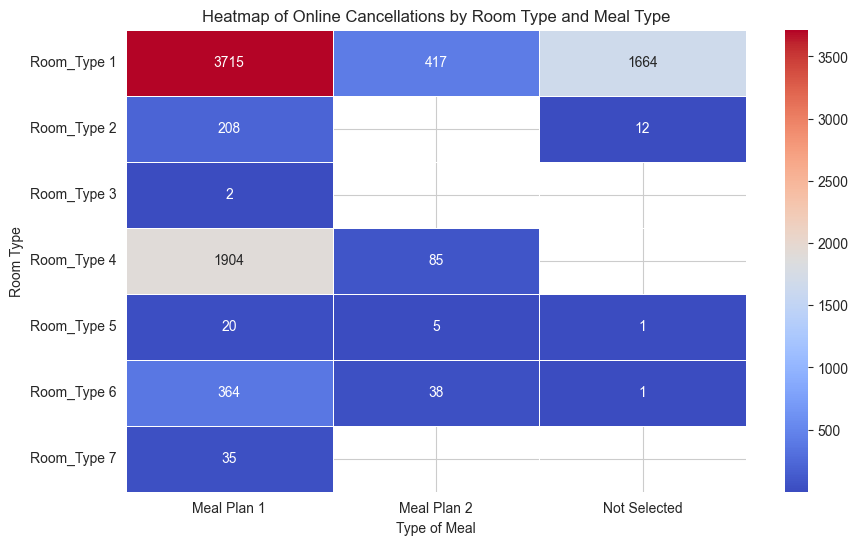

In [ ]:

# Filter dataset for only canceled bookings of new customers in the "Online" market segment
canceled_online_customers = data[(data["booking status"] == "Canceled") & 
                                 (data["repeated"] == 0) & 
                                 (data["market segment type"] == "Online")]

cancellation_counts = canceled_online_customers.groupby(["room type", "type of meal"]).size().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(cancellation_counts, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Online Cancellations by Room Type and Meal Type")
plt.xlabel("Type of Meal")
plt.ylabel("Room Type")
plt.show()


# #----------------------Insights-----------#
# high % that the default in onlline is room1 & meal1, so what happens in offline???
# Investigate Room_Type 1 cancellations (pricing, policies, and customer feedback).
# Reassess Meal Plan 1 pricing and benefits to reduce cancellations.
# Check Room_Type 3 to see why it has low cancellations—does it attract a specific type of customer?
# Analyze "No Meal Plan" cancellations to understand if customers prefer flexible meal options.


#### B.2) Focus on Offline cancellations

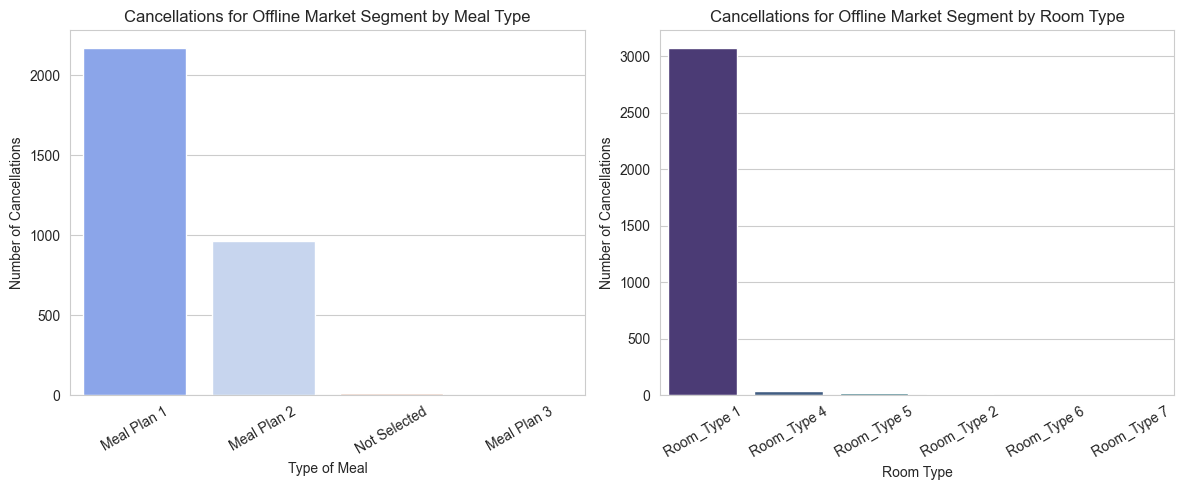

In [ ]:

canceled_new_customers = data[(data["booking status"] == "Canceled") & (data["repeated"] == 0)]         # Filter dataset for only canceled bookings of new customers

# Further filter for only 'Online' market segment
online_customers = canceled_new_customers[canceled_new_customers["market segment type"] == "Offline"]   # Filter for only Offline market segment

meal_counts = online_customers["type of meal"].value_counts()
room_counts = online_customers["room type"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Meal Plan Cancellations
sns.barplot(x=meal_counts.index, y=meal_counts.values, palette="coolwarm", ax=axes[0])
axes[0].set_title("Cancellations for Offline Market Segment by Meal Type")
axes[0].set_xlabel("Type of Meal")
axes[0].set_ylabel("Number of Cancellations")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)

# Plot Room Type Cancellations
sns.barplot(x=room_counts.index, y=room_counts.values, palette="viridis", ax=axes[1])
axes[1].set_title("Cancellations for Offline Market Segment by Room Type")
axes[1].set_xlabel("Room Type")
axes[1].set_ylabel("Number of Cancellations")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()

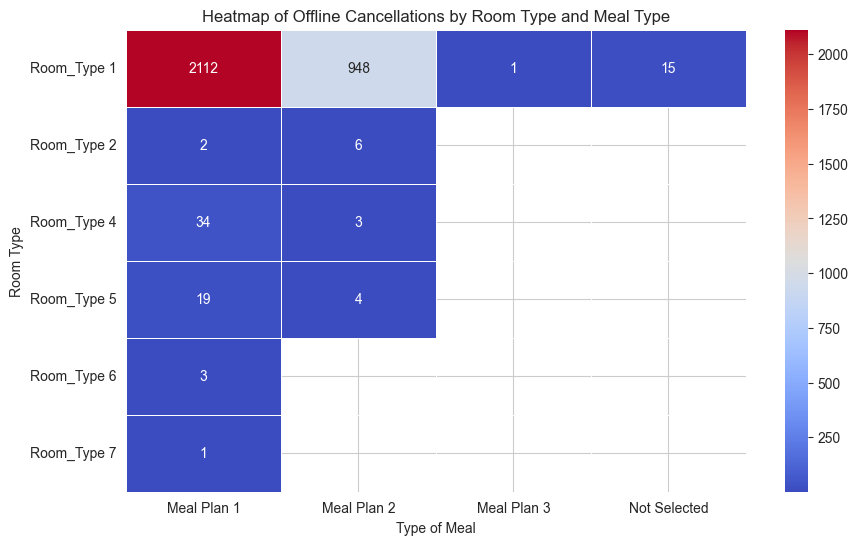

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter dataset for only canceled bookings of new customers in the "Online" market segment
canceled_online_customers = data[(data["booking status"] == "Canceled") & 
                                 (data["repeated"] == 0) & 
                                 (data["market segment type"] == "Offline")]

cancellation_counts = canceled_online_customers.groupby(["room type", "type of meal"]).size().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(cancellation_counts, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Offline Cancellations by Room Type and Meal Type")
plt.xlabel("Type of Meal")
plt.ylabel("Room Type")
plt.show()

#-------------------------------------------Insights----------------------#
# From online & offline insights there is a serious problem in room1 & meal1 
# If Room_Type 1 with Meal Plan 1 has high cancellations, it might indicate pricing concerns, leading to rebooking in other segments.
# A pricing or promotional strategy can help reduce these cancellations.
# Consider stricter cancellation policies for high-cancelled segments.
# Offer discounts for customers who confirm their booking closer to their check-in date.

## 4. Categorical Transformation

### A) Label Encoding

In [67]:

encoder = LabelEncoder()
dataset_treated["booking status"] = encoder.fit_transform(dataset_treated["booking status"])  # Canceled=1, Not Canceled=0


In [ ]:

# Apply Label Encoding to all categorical features
label_encoders = {}  
transformed_dataset_encoded = dataset_treated.copy() 

for col in cat_cols:
    le = LabelEncoder()
    transformed_dataset_encoded[col] = le.fit_transform(dataset_treated[col])
    label_encoders[col] = le  

transformed_dataset_encoded.head()
print(transformed_dataset_encoded.dtypes)

Booking_ID                          object
number of adults                     int64
number of children                 float64
number of weekend nights             int64
number of week nights                int64
type of meal                         int64
car parking space                    int64
room type                            int64
lead time                            int64
market segment type                  int64
repeated                             int64
P-C                                float64
P-not-C                            float64
average price                      float64
special requests                   float64
date of reservation         datetime64[ns]
booking status                       int64
Year-Month                       period[M]
dtype: object


In [ ]:
transformed_dataset_encoded['Year-Month'] = transformed_dataset_encoded['Year-Month'].astype(str)
transformed_dataset_encoded['Year-Month'] = pd.to_datetime(transformed_dataset_encoded['Year-Month'])
transformed_dataset_encoded['Year-Month'] = transformed_dataset_encoded['Year-Month'].astype(int) // 10**9  
transformed_dataset_encoded['date of reservation'] = pd.to_datetime(transformed_dataset_encoded['date of reservation'], errors='coerce')
transformed_dataset_encoded['date of reservation'] = transformed_dataset_encoded['date of reservation'].astype(int) // 10**9  



transformed_dataset_encoded=transformed_dataset_encoded.drop(columns="Booking_ID")

In [71]:

corr_matrix = transformed_dataset_encoded.corr()

corr_with_target = corr_matrix["booking status"].sort_values(ascending=False)

print(corr_with_target)



booking status              1.000000
special requests            0.254073
repeated                    0.107277
P-not-C                     0.102840
car parking space           0.086179
P-C                         0.057913
Year-Month                 -0.015454
date of reservation        -0.015477
room type                  -0.022877
number of children         -0.026543
type of meal               -0.026772
number of weekend nights   -0.061489
number of adults           -0.086774
number of week nights      -0.092824
market segment type        -0.136005
average price              -0.142433
lead time                  -0.438491
Name: booking status, dtype: float64


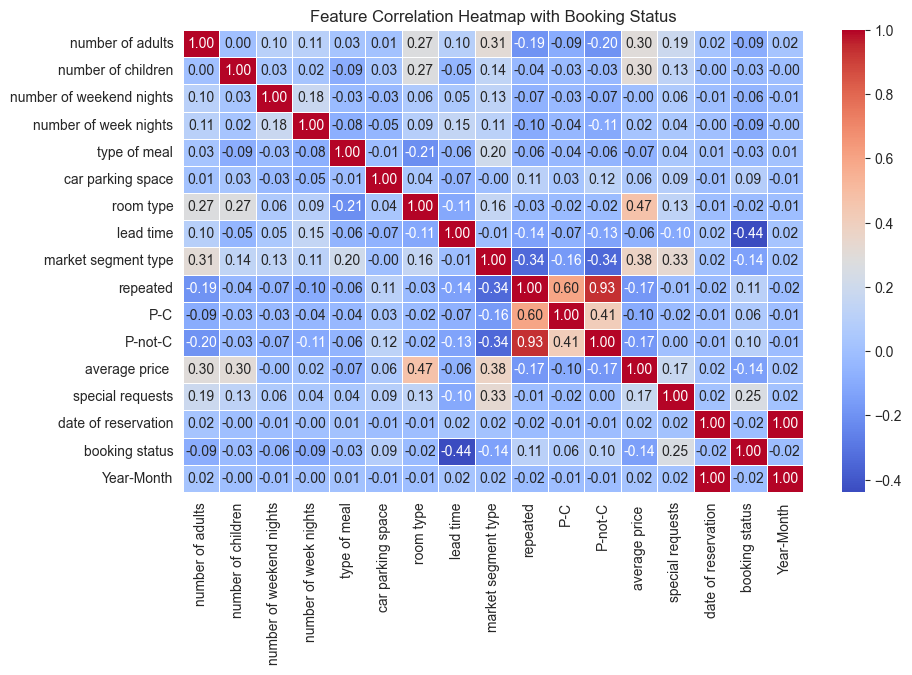

In [72]:

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap with Booking Status")
plt.show()


### B) Model Preparation

##### B.1) Use Mutual Information (MI)

In [ ]:

# Define Features 
X = transformed_dataset_encoded.drop(columns=["booking status"]) 

# Define Target
y = transformed_dataset_encoded["booking status"]  

In [ ]:

mi_scores = mutual_info_classif(X, y)  
feature_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Feature Importance (Mutual Information):")
print(feature_scores)

# Mutual information measures how much information a feature contributes to the target variable.


Feature Importance (Mutual Information):
lead time                   0.131419
average price               0.093154
date of reservation         0.091879
Year-Month                  0.052285
special requests            0.039422
market segment type         0.011447
number of adults            0.008690
number of weekend nights    0.007781
number of week nights       0.006208
repeated                    0.005743
P-not-C                     0.004341
type of meal                0.004101
car parking space           0.004051
number of children          0.003450
P-C                         0.002038
room type                   0.000000
dtype: float64


##### B.2) Use Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# RFE selects the most important features by training KNN iteratively and eliminating the least important ones

Selected Features: Index(['lead time', 'average price ', 'special requests',
       'date of reservation', 'Year-Month'],
      dtype='object')


##### B.3) Use PCA for Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # Reduce to 5 features
X_pca = pca.fit_transform(X)

print(f"Reduced to {X_pca.shape[1]} principal components")

# Use If the number of features is too high, you can reduce them 

Reduced to 5 principal components


## 5.Train Test Split

### 5.1) Selected Features

In [76]:
# Define independent variables (features)
X = transformed_dataset_encoded[["lead time", "repeated",   "special requests", "average price ","P-not-C","date of reservation", 'market segment type']]

# Define dependent variable (target)
y = transformed_dataset_encoded["booking status"]


### 5.2) Preperations before Modeling

In [ ]:
from sklearn.decomposition import PCA  # Import PCA class

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Scailing by Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Step 3: Multicolinearity by PCA
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 4: Imbalancing by SMOTE 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)


## 6. Modeling & Accuracy

### A) KNN

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      2378
           1       0.92      0.84      0.88      4879

    accuracy                           0.84      7257
   macro avg       0.82      0.84      0.83      7257
weighted avg       0.85      0.84      0.85      7257



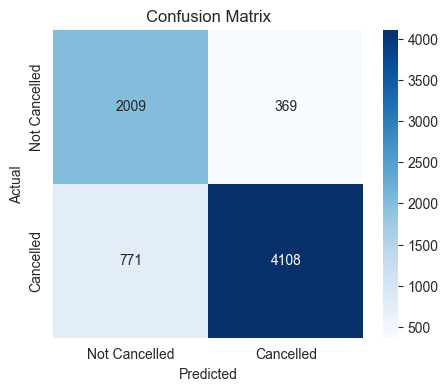

Cross-Validation Accuracy Scores: [0.84437044 0.84155245 0.84641988 0.83463558 0.84844991]
Mean Accuracy: 0.8431
Standard Deviation: 0.0048
Number of PCA Components Retained: 6
Explained Variance Ratio: 0.9910


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# Step 5: Train the KNN model using the resampled dataset
knn = KNeighborsClassifier(n_neighbors=15)  
knn.fit(X_train_resampled, y_train_resampled)

# Step 6: Make predictions on the test set
y_pred = knn.predict(X_test_pca)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Cancelled", "Cancelled"], yticklabels=["Not Cancelled", "Cancelled"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 9: Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

# Step 10: Display Number of PCA Components Retained
print(f"Number of PCA Components Retained: {X_train_pca.shape[1]}")
print(f"Explained Variance Ratio: {np.sum(pca.explained_variance_ratio_):.4f}")


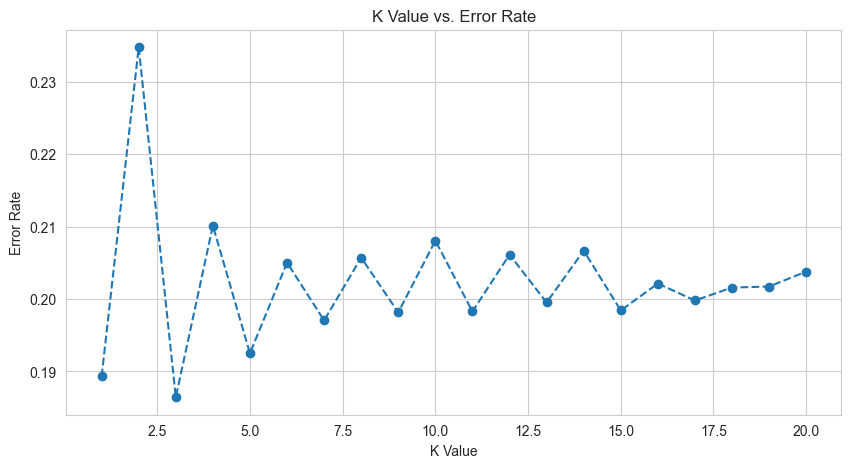

In [ ]:
import matplotlib.pyplot as plt
error_rates = []

for k in range(1, 21):                              # Tune K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='dashed')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("K Value vs. Error Rate")
plt.show()


### B) Logistic Regression

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.64      0.78      0.71      2378
           1       0.88      0.79      0.83      4879

    accuracy                           0.79      7257
   macro avg       0.76      0.78      0.77      7257
weighted avg       0.80      0.79      0.79      7257



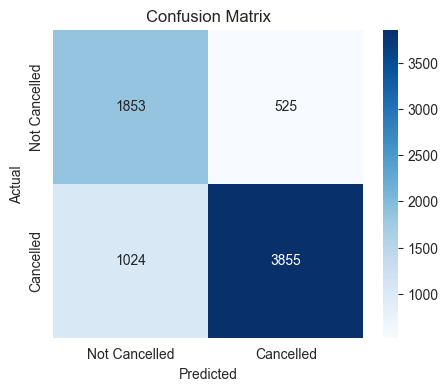

Cross-Validation Accuracy Scores: [0.77955681 0.77392084 0.77481747 0.77302421 0.78362798]
Mean Accuracy: 0.7770
Standard Deviation: 0.0040


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the Logistic Regression model using the resampled dataset
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Cancelled", "Cancelled"], yticklabels=["Not Cancelled", "Cancelled"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


### C) Random Forest   (Selected Model for Flask)

🔹 Model Accuracy: 0.8918

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2402
           1       0.91      0.94      0.92      4855

    accuracy                           0.89      7257
   macro avg       0.88      0.87      0.88      7257
weighted avg       0.89      0.89      0.89      7257



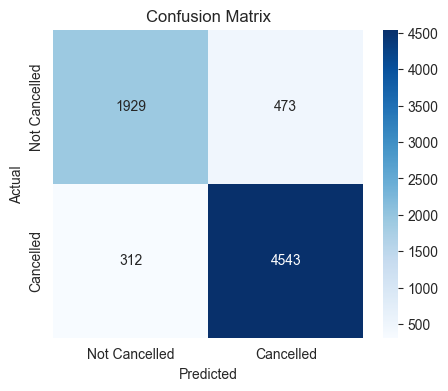

Stratified Cross-Validation Scores: [0.8904506  0.89830508 0.89279317 0.89430894 0.89003721]
Mean Accuracy: 0.8932
✅ Model training complete and saved as 'hotel_booking_model.pkl'


In [ ]:
import pickle
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Cancelled", "Cancelled"], yticklabels=["Not Cancelled", "Cancelled"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(RFC, X, y, cv=skf, scoring='accuracy')

print(f"Stratified Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")


# Save Model with highest accuaracy to use with flask
pickle.dump(RFC, open("hotel_booking_model.pkl", "wb"))
print("\u2705 Model training complete and saved as 'hotel_booking_model.pkl'")



### D) XGBoost

🔹 Model Accuracy: 0.8736

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      2402
           1       0.89      0.93      0.91      4855

    accuracy                           0.87      7257
   macro avg       0.86      0.85      0.85      7257
weighted avg       0.87      0.87      0.87      7257



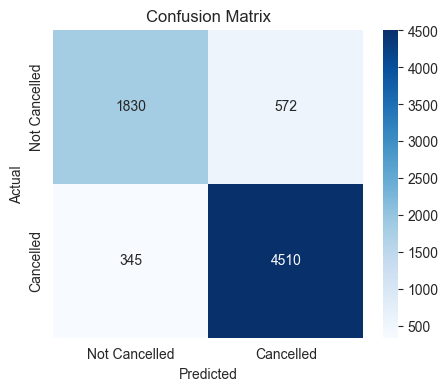

Stratified Cross-Validation Scores: [0.87060769 0.8836985  0.86826512 0.87198567 0.87556842]
Mean Accuracy: 0.8740


In [ ]:
import xgboost as xgb

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
XGB = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'  # Avoids warning for classification
)
XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Cancelled", "Cancelled"], yticklabels=["Not Cancelled", "Cancelled"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(XGB, X, y, cv=skf, scoring='accuracy')

print(f"Stratified Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")


### E) SVM

🔹 Model Accuracy: 0.6690

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2402
           1       0.67      1.00      0.80      4855

    accuracy                           0.67      7257
   macro avg       0.33      0.50      0.40      7257
weighted avg       0.45      0.67      0.54      7257



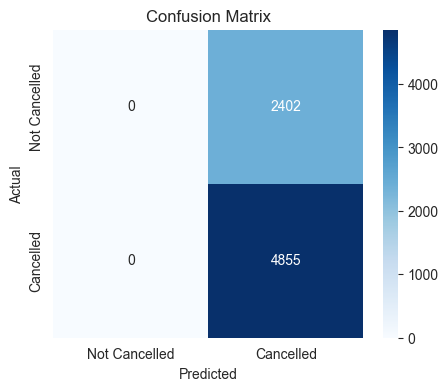

Stratified Cross-Validation Scores: [0.67245418 0.67231638 0.67231638 0.67231638 0.67231638]
Mean Accuracy: 0.6723


In [ ]:
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Cancelled", "Cancelled"], yticklabels=["Not Cancelled", "Cancelled"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(svm_model, X, y, cv=skf, scoring='accuracy')

print(f"Stratified Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
